This project largely serves as a means for me to look at my Spotify music listening statistics and to identify trends and undertand how my taste in music has changed over time.
It has been set up such that, with minor modifications, anyone could use it by loading their own listening statistics from Spotify.  

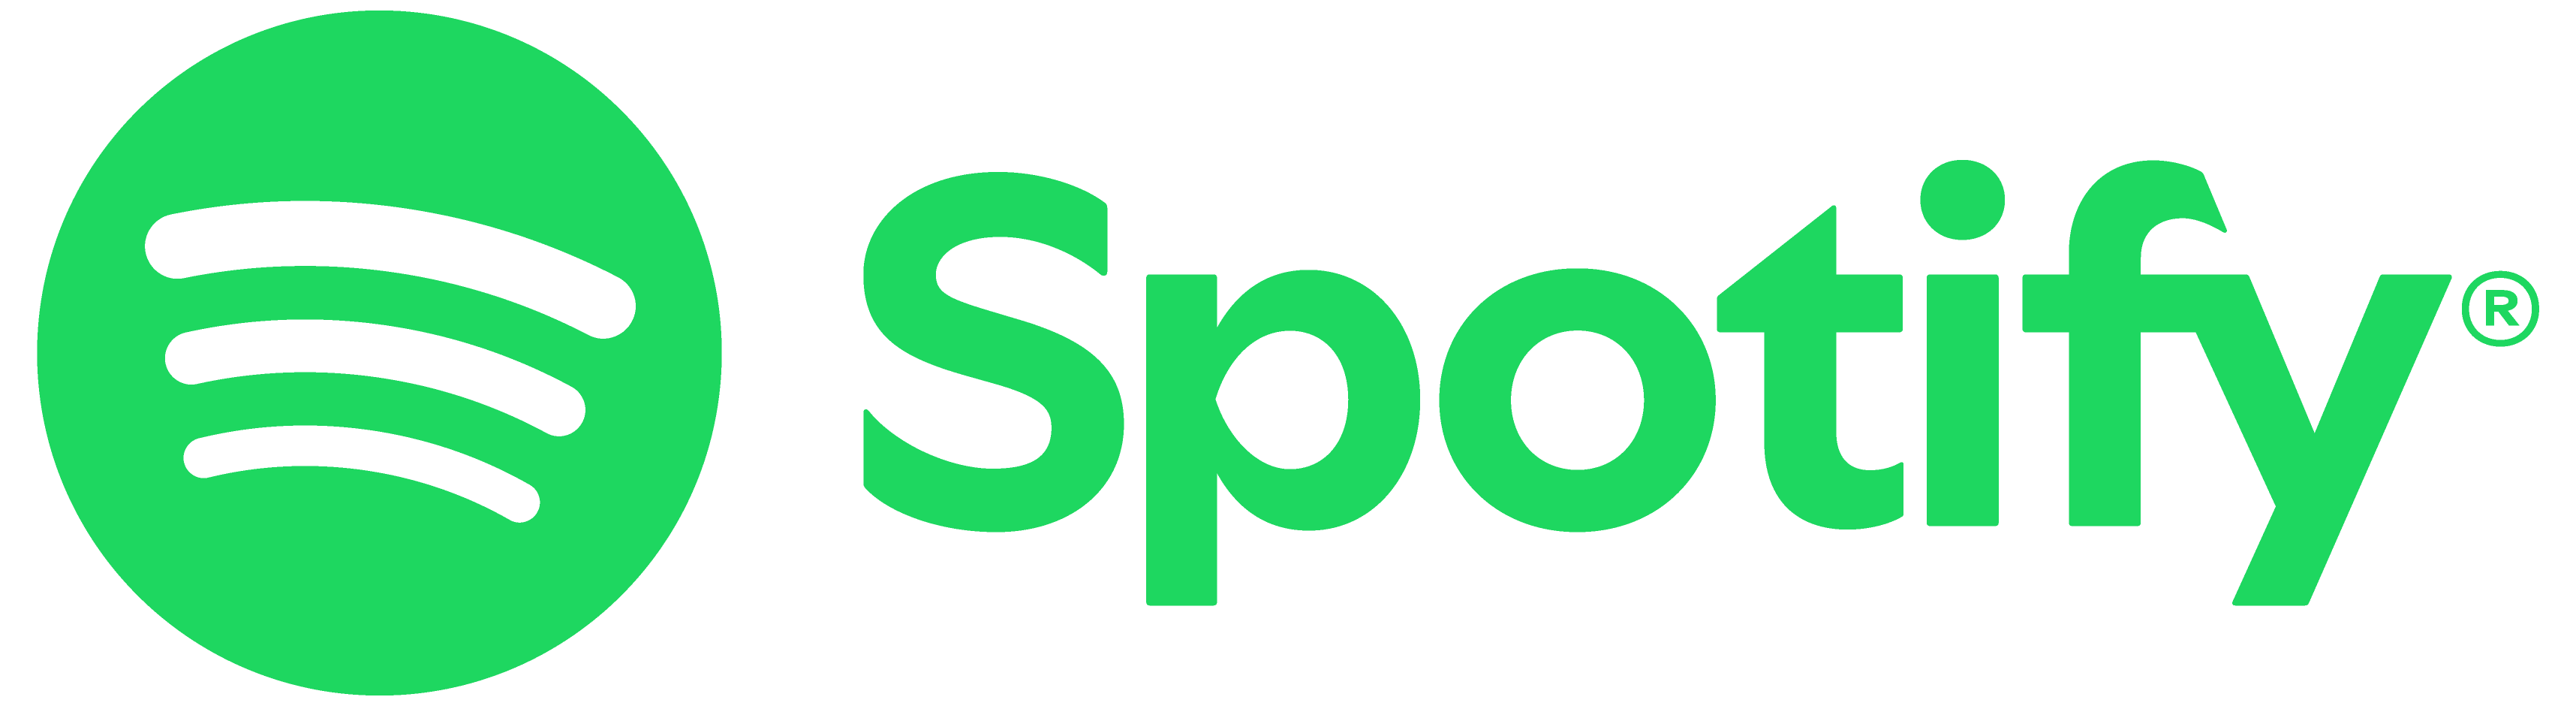

Image Source: https://newsroom.spotify.com/media-kit/logo-and-brand-assets/

In [ ]:
import pandas as pd
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = "retina" #higher quality graphs
%matplotlib inline



import time

start_time = time.time()

In [ ]:
#importing .json files containing Spotify usage data

file_list = glob.glob('/content/drive/MyDrive/Coding/Spotify Extended Streaming History/*.json')

data_frames = []
for file in file_list:
  data_frames.append(pd.read_json(file))

In [ ]:
#Storing all the read-in files in one dataframe
dataframe = pd.concat(data_frames)
original_data = dataframe #Preserving original data

Initial Inspection of the data

In [ ]:
dataframe.shape

(289636, 23)

There are 289,636 entries and 23 columns in the dataframe

In [ ]:
dataframe.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode'],
      dtype='object')

Columns relating to podcasts and audiobooks will be dropped as it's the music playtime statistics that I am looking for.

Prior to displaying the initial inspection of the dataset, the columns 'platform', 'conn_country', and 'ip_addr' will be removed to protect my privacy and as it adds no real value for the current scope of the analysis.

In [ ]:
dataframe = dataframe.drop(columns=['platform', 'conn_country', 'ip_addr'])

In [ ]:
dataframe.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,audiobook_title,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2019-11-20T15:00:06Z,254049,Kids in Love (feat. The Night Game),Kygo,Kids in Love,spotify:track:5nmHl233yo8XJvaNfdKAWU,None,None,None,NaN,NaN,NaN,NaN,trackdone,endplay,True,False,1.0,1.574231e+12,True
1,2019-11-20T15:00:06Z,865,Orphans,Coldplay,Orphans / Arabesque,spotify:track:6muOWhMh7Tf0UFUtMDBhUR,None,None,None,NaN,NaN,NaN,NaN,fwdbtn,fwdbtn,False,False,1.0,1.574255e+12,True
2,2019-11-20T15:00:06Z,2303,The Reason,Hoobastank,The Reason,spotify:track:77loZpT5Y5PRP1S451P9Yz,None,None,None,NaN,NaN,NaN,NaN,fwdbtn,fwdbtn,False,False,1.0,1.574255e+12,True
3,2019-11-20T15:00:06Z,6874,Orphans,Coldplay,Orphans / Arabesque,spotify:track:6muOWhMh7Tf0UFUtMDBhUR,None,None,None,NaN,NaN,NaN,NaN,fwdbtn,fwdbtn,False,False,1.0,1.574262e+12,True
4,2019-11-20T15:00:06Z,184360,This Town (feat. Sasha Alex Sloan),Kygo,Stargazing - EP,spotify:track:4aSfgWmRa9KsISD4Jmx7QB,None,None,None,NaN,NaN,NaN,NaN,playbtn,endplay,True,False,1.0,1.574245e+12,True


In [113]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289636 entries, 0 to 3943
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ts                                 289636 non-null  object 
 1   ms_played                          289636 non-null  int64  
 2   master_metadata_track_name         289358 non-null  object 
 3   master_metadata_album_artist_name  289358 non-null  object 
 4   master_metadata_album_album_name   289358 non-null  object 
 5   spotify_track_uri                  289358 non-null  object 
 6   episode_name                       278 non-null     object 
 7   episode_show_name                  278 non-null     object 
 8   spotify_episode_uri                278 non-null     object 
 9   audiobook_title                    0 non-null       float64
 10  audiobook_uri                      0 non-null       float64
 11  audiobook_chapter_uri              0 non-null 

Inspecting for any missing data

In [ ]:
dataframe.isna().sum()

,0
ts,0
ms_played,0
master_metadata_track_name,278
master_metadata_album_artist_name,278
master_metadata_album_album_name,278
spotify_track_uri,278
episode_name,289358
episode_show_name,289358
spotify_episode_uri,289358
audiobook_title,289636


There's plenty of missing values but mostly in the columns we are uninterested in.

## Data Cleaning

In [ ]:
#Removing irrelevant columns
dataframe = dataframe.drop(columns=['episode_name', 'audiobook_title', 'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
                                    'episode_show_name', 'spotify_episode_uri', 'incognito_mode',
                                    'skipped', 'reason_end', 'offline', 'offline_timestamp', 'reason_start', 'shuffle'])


In [ ]:
dataframe.isna().sum().max()

278

In [ ]:
dataframe.notna().sum().max()

289636

As the amount of missing data accounts for less than 0.1% of the total data, these values will be removed and its impact on the analysis should be negligible.

In [ ]:
#Preserving the removed values in case it needs to be referred to later
dropped_rows = dataframe[dataframe["master_metadata_track_name"].isnull()]
dataframe.dropna(inplace=True)

In [ ]:
dataframe.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri
0,2019-11-20T15:00:06Z,254049,Kids in Love (feat. The Night Game),Kygo,Kids in Love,spotify:track:5nmHl233yo8XJvaNfdKAWU
1,2019-11-20T15:00:06Z,865,Orphans,Coldplay,Orphans / Arabesque,spotify:track:6muOWhMh7Tf0UFUtMDBhUR
2,2019-11-20T15:00:06Z,2303,The Reason,Hoobastank,The Reason,spotify:track:77loZpT5Y5PRP1S451P9Yz
3,2019-11-20T15:00:06Z,6874,Orphans,Coldplay,Orphans / Arabesque,spotify:track:6muOWhMh7Tf0UFUtMDBhUR
4,2019-11-20T15:00:06Z,184360,This Town (feat. Sasha Alex Sloan),Kygo,Stargazing - EP,spotify:track:4aSfgWmRa9KsISD4Jmx7QB


The definition of each of the column names, according to Spotify, are:


*   ts : a timestamp indicating when the song stopped playing in UTC (Coordinated Universal Time).
*   ms_played : the number of milliseconds the stream was played


*   master_metadata_track_name : name of the track
*   master_metadata_album_artist_name: name of the artist or band


*   master_metadata_album_album_name: name of the album of the track
*   spotify_track_uri: A Spotify URI, uniquely identifying the track in the form of "spotify:track:string". A Spotify URI is a resource identifier that you can enter, for example, in the Spotify Desktop client's search box to locate an artist, album, or track.







The "ts" column can converted to two columns containing the date and time respectively, for ease of access.  The spotify_track_id column can be cleaned to remove the repeating element "spotify:track:" as it is redundant.

Converting the "ts" column into datetime

In [ ]:
dataframe["Date/Time"] = pd.to_datetime(dataframe["ts"])

Seperating the dates and time into more accessible values

In [ ]:
dataframe["Date"] = pd.to_datetime(dataframe["Date/Time"].dt.date)

dataframe["Time"] = dataframe["Date/Time"].dt.time
dataframe["Year"] = dataframe["Date/Time"].dt.year
dataframe["Month"] = dataframe["Date/Time"].dt.month

Dropping "ts" column as the data is contained in the "Date" and "Time" columns


In [ ]:
dataframe = dataframe.drop(columns = ["ts", "Date/Time"])

Removing the leading string "spotify:track:" in the "spotify_track_uri"


In [ ]:
dataframe["spotify_track_uri"] = dataframe["spotify_track_uri"].astype(str)
dataframe["spotify_track_uri"] = dataframe["spotify_track_uri"].map(lambda x: x.lstrip('spotify:track:'))

Renaming columns for ease of usage

In [ ]:
dataframe = dataframe.rename(columns = {"master_metadata_track_name":"Track_name","master_metadata_album_artist_name":"Artist",
                                        "master_metadata_album_album_name":"Album", "spotify_track_uri":"track_id"})



Arranging the dataset in ascending order of the date and time

In [ ]:
dataframe.sort_values(['Date', 'Time'], inplace=True)

Inspecting the final entry in the dataset

In [ ]:
dataframe.tail(1)

,ms_played,Track_name,Artist,Album,track_id,Date,Time,Year,Month
3861,645,Gabriela,KATSEYE,Gabriela,1xOqGUkyxGQRdCvGpvWKmL,2025-10-12,23:56:58,2025,10


The last input in the dataframe is dated at 12th of October, 2025. The analysis for the listening trends in 2025 can only be conducted upto this date.

In [ ]:
dataframe.shape

(289358, 9)

Sometimes, Artists tend to stylize their names by using `$` to denote an 's'. As it is a special character, it may cause problems down the line so the `$` will be replaced with an 's'.

In [ ]:
print(dataframe[dataframe["Artist"].str.contains('\\$')]["Artist"].unique())
dataframe[dataframe["Artist"].str.contains('\\$')].count()

['A$AP Ferg' 'A$AP Rocky' 'MARTIN $KY' 'Mun$' 'Pink Sweat$'
 'Ty Dolla $ign' 'Hans Hu$tle' 'Joey Bada$$' '$NOT' 'K$upreme' 'A$AP Mob'
 '$uicideboy$' 'Curren$y' '¥$' 'bbno$' 'WE$TPHAL' 'Chri$tian Gate$'
 'Ro$ama']


,0
ms_played,1637
Track_name,1637
Artist,1637
Album,1637
track_id,1637
Date,1637
Time,1637
Year,1637
Month,1637


There are 1,637 entries with an Artist who has stylised their name in the aforementioned way.

In [ ]:
#Replacing '$' with 's'

dataframe["Artist"] = dataframe['Artist'].str.replace(r'$', 's')

dataframe[dataframe["Artist"].str.contains('\\$')].count() #Confirming the replacement was successful

,0
ms_played,0
Track_name,0
Artist,0
Album,0
track_id,0
Date,0
Time,0
Year,0
Month,0


In [ ]:
print(dataframe['ms_played'].min())
dataframe[dataframe['ms_played'] == 0].count()

0


,0
ms_played,18964
Track_name,18964
Artist,18964
Album,18964
track_id,18964
Date,18964
Time,18964
Year,18964
Month,18964


There are over 18,000 entries where the track has registered a playtime of 0 ms. As this provides no real insight into the listening trends, these entries will be removed to another dataframe for reference.

In [ ]:
dataframe["ms_played"][dataframe['ms_played'] < 1000].count()

np.int64(55593)

Furthermore, there are over 55,000 tracks with a playtime of less than 1 second. These values will also be removed and preserved as they do not add any value to the current goal of this analysis.

In [ ]:
dataframe_less_than_1s = dataframe[dataframe['ms_played'] < 1000]
dataframe = dataframe[dataframe['ms_played'] >= 1000]

Currently, the playtime of songs is stored in milliseconds. In order to determine meaningful insights of listening trends, the playtime will be converted to minutes.

In [ ]:
dataframe["ms_played"] = dataframe["ms_played"]/60000
dataframe["Minutes"] = dataframe["ms_played"]
del dataframe["ms_played"] #Removing 'ms_played'

In [ ]:
#Inspecting for duplicated values
dataframe[dataframe.duplicated()].count()

,0
Track_name,4528
Artist,4528
Album,4528
track_id,4528
Date,4528
Time,4528
Year,4528
Month,4528
Minutes,4528


In [ ]:
dataframe[dataframe.duplicated].sort_values(["Track_name","Date", "Time"])

,Track_name,Artist,Album,track_id,Date,Time,Year,Month,Minutes
3910,(I Can't Help) Falling In Love With You,UB40,Promises And Lies,7ojJ4XvqBhBcteM0zjMebT,2018-12-11,18:17:24,2018,12,3.457333
13972,(I Can't Help) Falling In Love With You,UB40,Promises And Lies,7ojJ4XvqBhBcteM0zjMebT,2020-08-23,18:55:13,2020,8,0.020250
3883,(I Just) Died In Your Arms,Cutting Crew,The Best Of Cutting Crew,0YPXkQthLWrhNGoKTbwCJ8,2018-12-11,18:17:24,2018,12,1.600733
12130,(I Just) Died In Your Arms,Cutting Crew,The Best Of Cutting Crew,0YPXkQthLWrhNGoKTbwCJ8,2021-06-26,11:35:33,2021,6,0.115733
10005,1+1,Sia,Music,71Taskl2O73XfpQtJciJCD,2022-01-13,07:16:54,2022,1,2.969550
...,...,...,...,...,...,...,...,...,...
4453,working,Tate McRae,working,31sSFHIe4NaxltVFOEIcTa,2021-10-22,16:26:52,2021,10,3.503650
4877,working,Tate McRae,working,31sSFHIe4NaxltVFOEIcTa,2021-10-27,19:13:36,2021,10,3.503650
4932,working,Tate McRae,working,31sSFHIe4NaxltVFOEIcTa,2021-10-27,19:13:36,2021,10,3.503650
4944,working,Tate McRae,working,31sSFHIe4NaxltVFOEIcTa,2021-10-27,19:13:36,2021,10,3.503650


There are over 4,000 duplicate entries in the dataframe. These will need to be removed.

In [ ]:
#Inspecting Dataset to ensure all duplicate values have been accounted for
dataframe[dataframe.duplicated(subset=['track_id','Artist' ,'Date', 'Time'])].sort_values(["Track_name", "Date", "Time"])

,Track_name,Artist,Album,track_id,Date,Time,Year,Month,Minutes
3910,(I Can't Help) Falling In Love With You,UB40,Promises And Lies,7ojJ4XvqBhBcteM0zjMebT,2018-12-11,18:17:24,2018,12,3.457333
4549,(I Can't Help) Falling In Love With You,UB40,Promises And Lies,7ojJ4XvqBhBcteM0zjMebT,2018-12-18,15:16:15,2018,12,0.021200
4607,(I Can't Help) Falling In Love With You,UB40,Promises And Lies,7ojJ4XvqBhBcteM0zjMebT,2018-12-18,15:16:15,2018,12,2.734400
7385,(I Can't Help) Falling In Love With You,UB40,Promises And Lies,7ojJ4XvqBhBcteM0zjMebT,2019-01-22,14:32:05,2019,1,0.028200
13972,(I Can't Help) Falling In Love With You,UB40,Promises And Lies,7ojJ4XvqBhBcteM0zjMebT,2020-08-23,18:55:13,2020,8,0.020250
...,...,...,...,...,...,...,...,...,...
4799,working,Tate McRae,working,31sSFHIe4NaxltVFOEIcTa,2021-10-27,19:13:36,2021,10,0.046400
4877,working,Tate McRae,working,31sSFHIe4NaxltVFOEIcTa,2021-10-27,19:13:36,2021,10,3.503650
4932,working,Tate McRae,working,31sSFHIe4NaxltVFOEIcTa,2021-10-27,19:13:36,2021,10,3.503650
4944,working,Tate McRae,working,31sSFHIe4NaxltVFOEIcTa,2021-10-27,19:13:36,2021,10,3.503650


However, by omitting the "Minutes" column in the search for duplicates, there appear to be 4,000 more entries which have the same track_id, Artist, Date, and Time for at least one entry in the dataframe. If the timestamps are accurate, it's impossible that "Minutes" column registered multiple legitimate values for the same timestamp. These values must have been recorded in error and will be removed. An example of this error is displayed in the cell below.

In [ ]:
dataframe[dataframe.duplicated(subset=['track_id','Artist' ,'Date', 'Time'])].sort_values(["Track_name", "Date", "Time"]).tail()



,Track_name,Artist,Album,track_id,Date,Time,Year,Month,Minutes
4799,working,Tate McRae,working,31sSFHIe4NaxltVFOEIcTa,2021-10-27,19:13:36,2021,10,0.04640
4877,working,Tate McRae,working,31sSFHIe4NaxltVFOEIcTa,2021-10-27,19:13:36,2021,10,3.50365
4932,working,Tate McRae,working,31sSFHIe4NaxltVFOEIcTa,2021-10-27,19:13:36,2021,10,3.50365
4944,working,Tate McRae,working,31sSFHIe4NaxltVFOEIcTa,2021-10-27,19:13:36,2021,10,3.50365
4975,working,Tate McRae,working,31sSFHIe4NaxltVFOEIcTa,2021-10-27,19:13:36,2021,10,3.50365


Viewing the shape of dataframe to reference once removal of duplicate rows is complete

In [ ]:
print(dataframe.shape)

(233765, 9)


In [ ]:
#Preserving the duplicated rows
duplicated_rows = dataframe[dataframe.duplicated(subset=['track_id','Artist' ,'Date', 'Time'])].sort_values(["Track_name", "Date", "Time"])
print(duplicated_rows.shape)

#Removing duplicates
dataframe = dataframe.drop_duplicates(subset=['track_id','Artist' ,'Date', 'Time'])
print(dataframe.shape)

(8657, 9)
(225108, 9)


In [ ]:
#Confirming that all duplicate values have been removed
dataframe[dataframe.duplicated(subset=['track_id','Artist' ,'Date', 'Time'])].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Track_name  0 non-null      object        
 1   Artist      0 non-null      object        
 2   Album       0 non-null      object        
 3   track_id    0 non-null      object        
 4   Date        0 non-null      datetime64[ns]
 5   Time        0 non-null      object        
 6   Year        0 non-null      int32         
 7   Month       0 non-null      int32         
 8   Minutes     0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int32(2), object(5)
memory usage: 0.0+ bytes


All duplicated values have been removed.


---



Artists tend to change their name on Spotify sometimes and this change will not be acknowledged retroactively. Any songs recorded into this dataset prior to the artist's name change kept the old name, while songs released after the name change reflected the artist's new name.

For example, in this dataset a song called *Heartbreak Anniversary*  with the track_id '3FAJ6O0NOHQV8Mc5Ri6ENp' is initially credited to an artist named Giveon.

However, from February 2025, the song is credited to GIVĒON. Giveon and GIVĒON are the same artist and he chose to update his name on Spotify in February 2025. In this notebook, Giveon and GIVĒON will register as two seperate artist, thereby impacting the listening statistics.

In [ ]:
dataframe.loc[dataframe['track_id'] == '3FAJ6O0NOHQV8Mc5Ri6ENp']['Artist'].unique()

array(['Giveon', 'GIVĒON'], dtype=object)

 As GIVĒON is the most up-to-date name, it is best to alter the entries with Giveon to GIVĒON, which would then allow for a more accurate estimation of the listening statistics. This replacement will be done for all artists in the dataframe that have changed their name on Spotify.

In [ ]:
# To check for duplicated spotify_track_id's with differing artist or track names

checker = dataframe.groupby(['Artist', 'Track_name', 'track_id']).agg(Count=('Artist', 'count'))
checker.reset_index(inplace=True)
check_df = checker[checker.duplicated(subset='track_id', keep=False)]

In [ ]:
print(check_df.shape)
check_df.head()

(71, 4)


,Artist,Track_name,track_id,Count
4,*NSYNC,Bye Bye Bye,62bOmKYxYg7dhrC6gH9vFn,1
5,*NSYNC,Bye Bye Bye - From Deadpool and Wolverine Soun...,62bOmKYxYg7dhrC6gH9vFn,1
1763,Beyoncé,Crazy In Love (feat. JAY-Z),0TwBtDAWpkpM3srywFVOV5,2
1765,Beyoncé,Crazy In Love (feat. Jay-Z),0TwBtDAWpkpM3srywFVOV5,5
1768,Beyoncé,Drunk in Love (feat. JAY-Z),6jG2YzhxptolDzLHTGLt7S,2


Some entries have the same spotify_track_id but differing track names. For example:

In [ ]:
dataframe.loc[dataframe['track_id'] == '45Egmo7icyopuzJN0oMEdk']['Track_name'].unique()

array(['Love Lies (with Normani)', 'Love Lies'], dtype=object)

The above track_id has two track names:


*   Love Lies (with Normani)
*   Love Lies

with the latter being the most recent name. Entries like this will also be corrected to reflect their most current track names.


In [ ]:
#For-loop to update duplicate tracks with the same track_id with their most current track names and artist names

temp_list = check_df['track_id']
for i in range(0, len(temp_list)):
  temp_id = temp_list.iloc[i]
  temp_df = dataframe[dataframe['track_id'] == temp_id]

  dataframe.loc[dataframe["track_id"] == temp_id, "Artist"] = temp_df['Artist'].iloc[-1]   #The last value will be the most up-to-date as it is taken from the
                                                                                                    # dataframe, where the entries were sorted in ascending order of the date
  dataframe.loc[dataframe["track_id"] == temp_id, "Track_name"] = temp_df['Track_name'].iloc[-1]

Confirming that the substituions were successful (having only a single value as the Artist or Track_name for a track_id):

In [ ]:
dataframe.loc[dataframe['track_id'] == '3FAJ6O0NOHQV8Mc5Ri6ENp']['Artist'].unique()

array(['GIVĒON'], dtype=object)

In [ ]:
dataframe.loc[dataframe['track_id'] == '45Egmo7icyopuzJN0oMEdk']['Track_name'].unique()

array(['Love Lies'], dtype=object)

## EDA and Creating Dataframes & Functions for Analysis



### Dataframes

In [ ]:
print(dataframe.duplicated(["Track_name"]).sum())

208834


There are over 200,000 songs that share the same track_name (they aren't necessarily by the same artists) in the dataframe. For example:

In [ ]:
dataframe[dataframe["Track_name"] == "Die For You"].groupby("Artist").count()

,Track_name,Album,track_id,Date,Time,Year,Month,Minutes
Artist,,,,,,,,
Joji,100,100,100,100,100,100,100,100
The Weeknd,489,489,489,489,489,489,489,489


Each song has a unique ID (spotify_track_id) that will be used to identify each track.

In [ ]:
#Creating a dataframe with each unique track and the total number of minutes the respective track was played
minutes_played_per_song = dataframe.groupby("track_id").agg(

    Minutes_Played = ("Minutes" , 'sum')
)

minutes_played_per_song.sort_values(by="Minutes_Played", ascending = False, inplace=True)
minutes_played_per_song.reset_index(inplace=True)

In [ ]:
num_of_unique_songs = dataframe.drop(columns=[ "Minutes"])

In [ ]:
#Creating a df that keeps track of each time a song was played (unique timestamp)

unique_track_counter = num_of_unique_songs.groupby(["track_id"]).agg(
    No_of_Seperate_Instances = ('track_id', 'count')
)

unique_track_counter.reset_index(inplace=True)
unique_track_counter.sort_values("No_of_Seperate_Instances", ascending=False, inplace=True)

In [ ]:
num_of_unique_songs = unique_track_counter.merge(right=num_of_unique_songs, left_on="track_id", right_on="track_id")
num_of_unique_songs.drop_duplicates("track_id", inplace=True)

#Changing the "Date" column to reflect the changes
num_of_unique_songs.rename(columns={"Date":"First_Played"}, inplace=True, index=None)

#DF with every unique track and the number of seperate times the song has been played
num_of_unique_songs = num_of_unique_songs.drop_duplicates(["Track_name", "Artist"])

#Adding the playtime of each track (Minutes_Played) to num_of_unique_songs df
num_of_unique_songs = num_of_unique_songs.merge(minutes_played_per_song,
                                                left_on="track_id", right_on="track_id")

num_of_unique_songs.sort_values(by="Minutes_Played", ascending=False, inplace=True)

num_of_unique_songs.shape

As of October 12, 2025, I have played 18,246 unique songs.

---



In [ ]:
#Dataframe with listening times for each artist per year

artist_years = dataframe.groupby(["Artist", "Year"]).agg(
    Minutes = ('Minutes', 'sum'),
    Times_listened = ('Artist', 'count')
)

artist_years.insert(len(artist_years.columns), "Hours", artist_years["Minutes"]/60)
artist_years.sort_values(by='Minutes', ascending=False, inplace=True)
artist_years.reset_index(inplace=True)
artist_years = artist_years.reindex(columns = ["Artist", "Times_listened", "Minutes", "Hours", "Year"])


In [ ]:
artist_years.sort_values(['Year', "Minutes"], ascending=False).head()

,Artist,Times_listened,Minutes,Hours,Year
0,The Weeknd,8188,19407.854300,323.464238,2025
5,Drake,3473,6956.485683,115.941428,2025
13,Sabrina Carpenter,2112,3298.473017,54.974550,2025
17,Ariana Grande,1605,2577.983067,42.966384,2025
19,Justin Bieber,1665,2363.757500,39.395958,2025


In [ ]:
# Creating a single dataframe that contains the top 10 artists of every year

top10_each_year = []

for i in range(2018, 2026):
  top10_each_year.append(artist_years[artist_years['Year'] == i][0:10])

top_10_all = pd.concat(top10_each_year)
top_10_all.reset_index(drop=True, inplace=True)

In [ ]:
#Dataframe containing total music listening times by month

playtime_by_month = dataframe.groupby(['Year','Month']).agg(
    Total_Minutes = ('Minutes', 'sum')
)

playtime_by_month.reset_index(inplace=True)

In [ ]:
months = {'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September',
		      '10':'October','11':'November','12':'December'}

playtime_by_month["Month"] = playtime_by_month["Month"].map(lambda x: months[str(x)][0:3]) #converting the month numbers to names for better comprehesion in graphs

In [ ]:
# Dataframe containing the total number of music playtime per year

listening_by_year = artist_years.groupby("Year").agg(
    Total_Minutes = ('Minutes', 'sum'),
    Total_Hours = ('Hours', 'sum')
)
listening_by_year.reset_index( inplace=True)
listening_by_year['Cumulative_Total_Hours'] = listening_by_year['Total_Hours'].cumsum()

total_hours = int(listening_by_year.iloc[-1]['Cumulative_Total_Hours'])

In [ ]:
# Dataframe with the total hours of playtime per artist

artist_total_hours  = artist_years.groupby('Artist').agg(Total_Minutes = ('Minutes', 'sum'),Total_Hours = ('Hours', 'sum'))
artist_total_hours.sort_values('Total_Minutes',ascending=False, inplace=True)
artist_total_hours.reset_index(inplace=True)
artist_total_hours["Percentage of Total Hours"] = ((artist_total_hours["Total_Hours"]/total_hours)*100).round(2)

artist_total_hours_top15 = artist_total_hours[0:15]

In [ ]:
#Dataframe with the top 5 artists per month

monthly_top5_artists = dataframe.groupby(["Artist", "Month", "Year"]).agg(
    Minutes = ('Minutes', 'sum')
)

monthly_top5_artists.reset_index(inplace=True)
monthly_top5_artists.sort_values("Minutes", ascending=False, inplace=True)

In [ ]:
#Dataframe with top 5 songs per month

monthly_top5_tracks = dataframe.groupby(['Track_name','track_id','Artist', 'Month', 'Year']).agg(
    Minutes = ('Minutes', 'sum')
)

monthly_top5_tracks.reset_index(inplace=True)
monthly_top5_tracks.sort_values(['Month', 'Year', 'Minutes'], ascending=False, inplace=True)

In [ ]:
#Dataframe to calculate changes in listening in the past year

changes_df = dataframe.groupby(["Artist", "Year"]).agg(Minutes=('Minutes', 'sum'))
changes_df = pd.pivot_table(changes_df, index="Artist", columns="Year", values='Minutes')
changes_df.reset_index(inplace=True)
changes_df= changes_df.rename_axis(None, axis=1)

changes_df["Change_%"] = 100*(changes_df[2025] - changes_df[2024])/changes_df[2024]
changes_df["Minutes Gained"] = changes_df[2025] - changes_df[2024]
changes_df = changes_df.fillna(0)
changes_df = changes_df.sort_values("Change_%", ascending=False)


### Spotify Data Extraction

From the data I was able to obtain via a data request to Spotify, there was some information that they didn't provide that I would have liked to have, such as the release date of a song or a link to a song's album cover. However, through Spotify's API, I collected the following information:

*   Popularity - value between 0 and 100 (100 is most popular). It's based on how many plays a track has gotten and how recent they were
*   Explicit - whether the track has explicit lyrics or not
*   Album Cover - URL of the cover of the album
*   Album Type - whether a track was a standalone song or part of an album
*   Release Date -  date of release of the album





In [ ]:
!pip install spotipy  # install if you don't have this library
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import time

In [ ]:
#Both the cid and secret are hidden for privacy
cid = "a1a4d2c243ef415a8f9b8cf300655a27"
secret = "280314ff30724b5b89d261242202bb34"

# Authorising the user (uncomment the next two comments if running the spotify_extractor_func)

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [114]:
track_ids = list(num_of_unique_songs['track_id'])

Spotify has established rate limits for their API, however it is unclear what the limit is. Hence, the spotify_extractor_func has been designed to run slowly, using batches for requests and a cooldown period where the new batch of track_ids are created in between the requests to Spotify.

Function to obtain the additional information with Spotify's API:

In [ ]:
def spotify_extractor_func(track_ids):

  artist_info, album_type, album_name, song_name,song_id ,release_date,explicit ,popularity ,url = ([] for i in range(9))
  batches, result, problem_after_this_id = ([] for i in range(3))
  num = 1
  limiter = len(track_ids)// 50

  while num <= limiter:
    for n in range(50):
      if len(track_ids) >1:
        batches.append(track_ids.pop(0))
      else:
        batches.append(track_ids[0])
    result = (sp.tracks(batches))
    num += 1
    for i in range(len(result['tracks'])):
      if result['tracks'][i] is None:
        problem_after_this_id.append(result['tracks'][i-1]['id'])
      else:
        artist_info.append(result['tracks'][i]['artists'][0]['name'])
        album_type.append(result['tracks'][i]['album']['album_type'])
        album_name.append(result['tracks'][i]['album']['name'])
        song_name.append(result['tracks'][i]['name'])
        song_id .append(result['tracks'][i]['id'])
        release_date.append(result['tracks'][i]['album']['release_date'])
        explicit.append(1 if result['tracks'][i]['explicit'] == True else 0)
        popularity.append(result['tracks'][i]['popularity'])
        try:
          url.append(result['tracks'][i]["album"]["images"][1]["url"])
        except IndexError:
          url.append('')
    batches = []

  additional_info_dict = {"artist": artist_info,
                        'track':song_name,
                        "album_type": album_type,
                        "album": album_name,
                        'track_id': song_id,
                        'release_date':release_date,
                        'explicit':explicit,
                        'popularity':popularity,
                        'cover':url
                        }

  additional_info = pd.DataFrame(additional_info_dict)

  return additional_info

In [ ]:
add_info_df = spotify_extractor_func(track_ids)

Adding the information from add_info_df to the main dataframe

In [ ]:
dataframe = dataframe.merge(
      right=add_info_df[['cover', 'album_type', 'track_id', 'release_date',
                         'explicit', 'popularity']],
            left_on='track_id', right_on='track_id', how='outer')

dataframe = dataframe.reindex(columns=["cover","Track_name", "Artist", "Album",
                                       "album_type","release_date", 'explicit',
                                       "popularity", "Date","Time",
                                       "Year", "Month", "Minutes" , "track_id"])

Adding the covers and release dates from add_info_df to num_of_unique_songs & monthly_top5_tracks

In [ ]:
num_of_unique_songs = num_of_unique_songs.merge(
    right=add_info_df[['track_id', 'cover', 'release_date']],
    left_on='track_id', right_on='track_id', how='left')

monthly_top5_tracks = monthly_top5_tracks.merge(
    right=add_info_df[['track_id', 'cover']],
    left_on='track_id', right_on='track_id', how='left')

In [ ]:
#Function to display the cover images
def image_display(url):
  return '<img src="{}" width=75></img>'.format(url)



---



### Further Inspection of Data

Creating a dataframe where the listening time is categorized by artists (artist_tracker)


In [ ]:
artist_tracker = num_of_unique_songs.groupby('Artist').agg(
    Minutes = ('Minutes_Played', 'sum'),
)
artist_tracker["Hours"] = artist_tracker["Minutes"]/60
artist_tracker["Days"] = artist_tracker["Hours"]/(24)

#Ordering the dataset from the most minutes played to the least
artist_tracker.sort_values(by='Minutes', ascending=False, inplace=True)

artist_tracker.reset_index(inplace=True)


In [ ]:
artist_tracker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Artist   6435 non-null   object 
 1   Minutes  6435 non-null   float64
 2   Hours    6435 non-null   float64
 3   Days     6435 non-null   float64
dtypes: float64(3), object(1)
memory usage: 201.2+ KB


There are over 6,000 entries in the artist_tracker df.

In [ ]:
artist_tracker.head(20)["Minutes"].median()

4271.487683333333

The top twenty artists in the dataset have a median of 4271 minutes

The top 5 artists with Playtime < 30 minutes:

                 Artist    Minutes     Hours      Days
887          Lucky Daye  29.979283  0.499655  0.020819
888            Kid Rock  29.725717  0.495429  0.020643
889      Charlotte Jane  29.644533  0.494076  0.020586
890            Tritonal  29.577150  0.492953  0.020540
891  Stanley Turrentine  29.520000  0.492000  0.020500



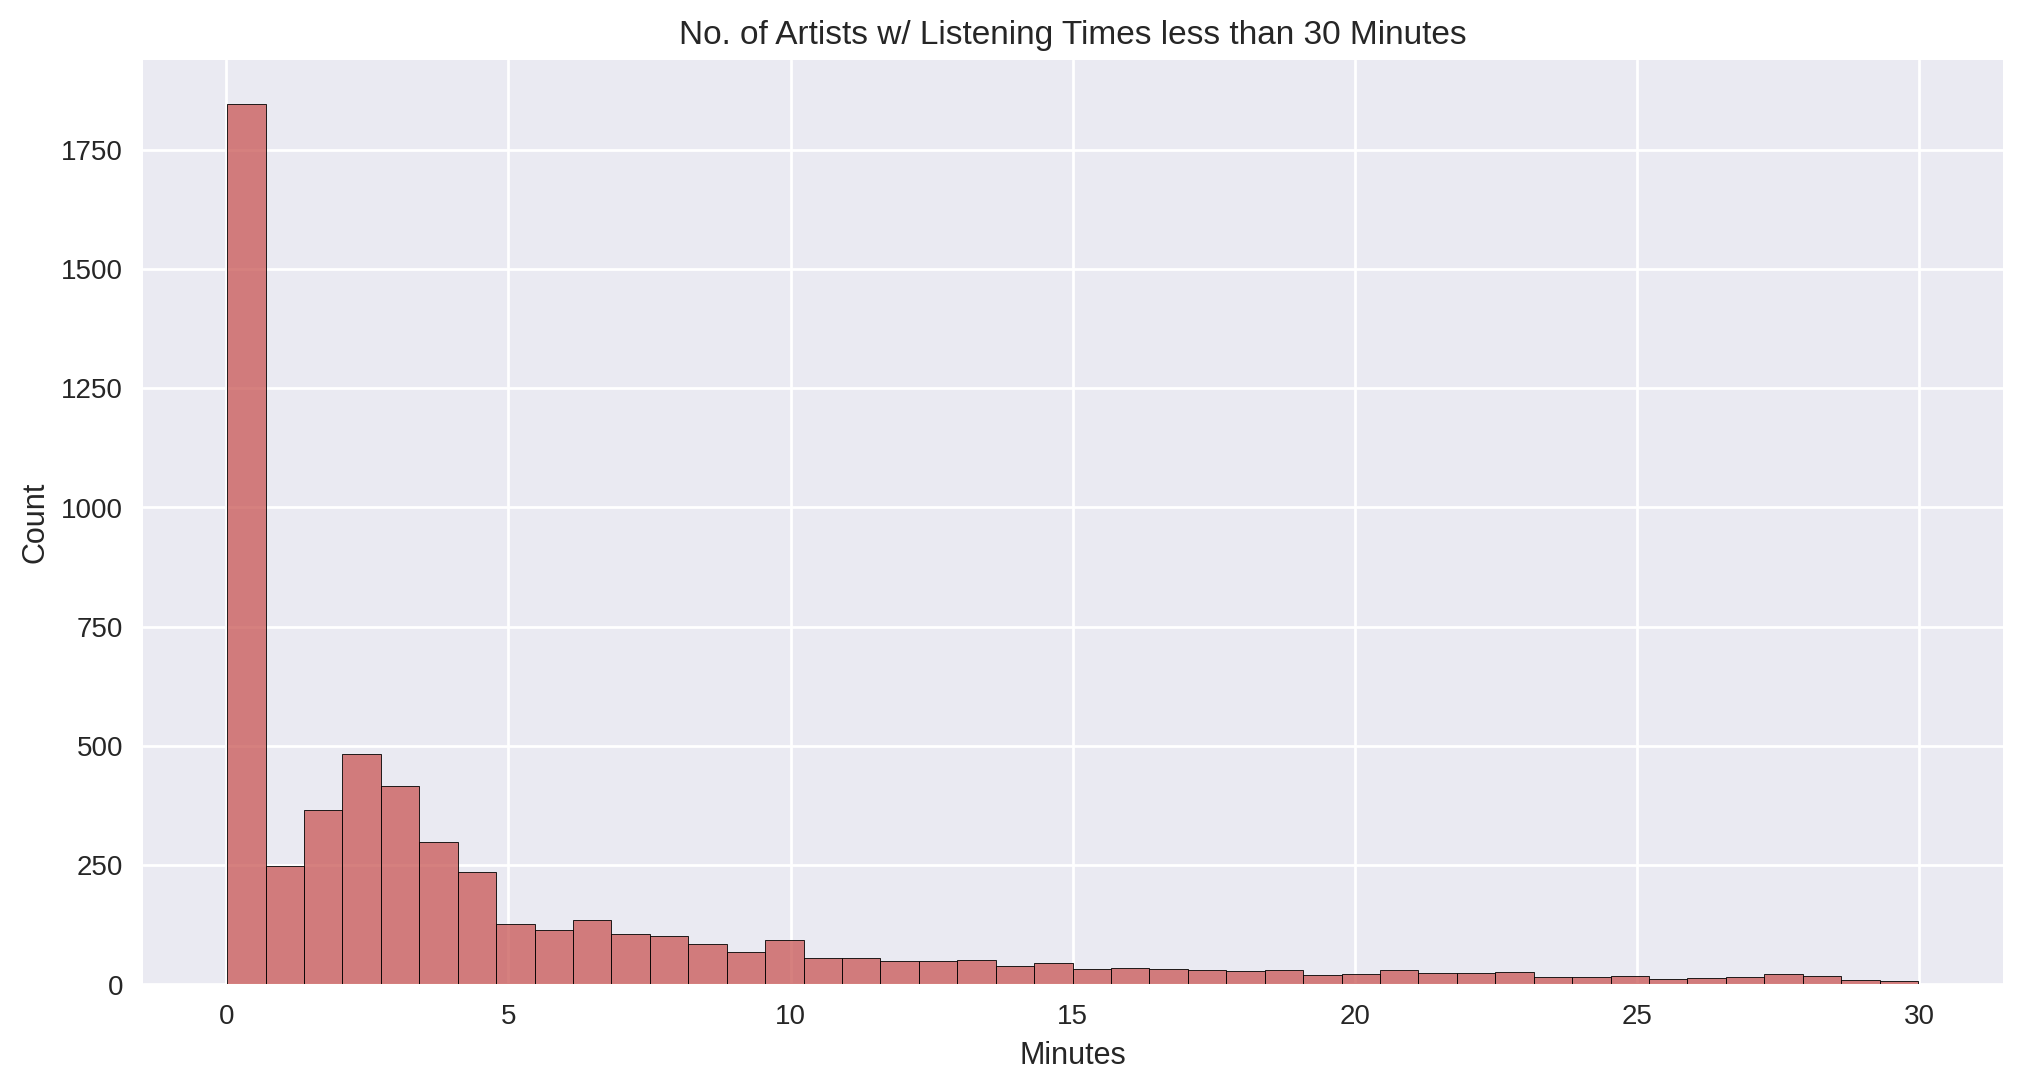

In [ ]:
#Plotting the distribution of artists with a playtime less than 30 minutes

print("The top 5 artists with Playtime < 30 minutes:")
print()
print(artist_tracker[artist_tracker["Minutes"] < 30][0:5])
print()

plt.style.use('seaborn-v0_8')

fig, ax = plt.subplots(1, 1, figsize=(12,6))

sns.histplot(artist_tracker[artist_tracker["Minutes"] < 30], x='Minutes', color='#C95654', ax=ax)
plt.title(f"No. of Artists w/ Listening Times less than {30} Minutes")
plt.show()

Majority of the artists in this dataset appear to who have a total playtime of less than 5 minutes. It's clear that omitting the artists in this dataset would have a negligible impact on the overall listening analysis.

In [ ]:
artist_tracker[artist_tracker["Minutes"] < 30].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5548 entries, 887 to 6434
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Artist   5548 non-null   object 
 1   Minutes  5548 non-null   float64
 2   Hours    5548 non-null   float64
 3   Days     5548 non-null   float64
dtypes: float64(3), object(1)
memory usage: 216.7+ KB


There are over 5,000 artists with a total playtime of less than 30 minutes.

As this is data spanning 8 years of listening, an artist with total playtime of less than 30 minutes doesn't appear significant to understanding overall listening trends.

Hence, for this analysis, we will seperate the dataset on this metric, while largely focusing only on artists who have a total playtime of at least 30 minutes.

In [ ]:
artist_tracker_removed = artist_tracker[artist_tracker["Minutes"] < 30] #Preserving the removed entries for later reference
artist_tracker = artist_tracker[artist_tracker["Minutes"] >= 30]

In [ ]:
print(artist_tracker[artist_tracker['Minutes'] <= 1000].info())

<class 'pandas.core.frame.DataFrame'>
Index: 828 entries, 59 to 886
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Artist   828 non-null    object 
 1   Minutes  828 non-null    float64
 2   Hours    828 non-null    float64
 3   Days     828 non-null    float64
dtypes: float64(3), object(1)
memory usage: 32.3+ KB
None


In [ ]:
print(artist_tracker[artist_tracker['Minutes'] > 1000].info())

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Artist   59 non-null     object 
 1   Minutes  59 non-null     float64
 2   Hours    59 non-null     float64
 3   Days     59 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.3+ KB
None


800+ artists have a playtime of less than or equal to 1000 minutes and 59 artists have a playtime of more than 1000 minutes. For ease of comprehension, the data will be visualized using the 1000 minute mark as well.

The top 5 artist with Playtime <= 1000 minutes:

           Artist     Minutes      Hours      Days
59     AsAP Rocky  983.077700  16.384628  0.682693
60  The Lumineers  977.729417  16.295490  0.678979
61   Clean Bandit  959.811467  15.996858  0.666536
62    Jack Harlow  955.424500  15.923742  0.663489
63         Avicii  937.001450  15.616691  0.650695



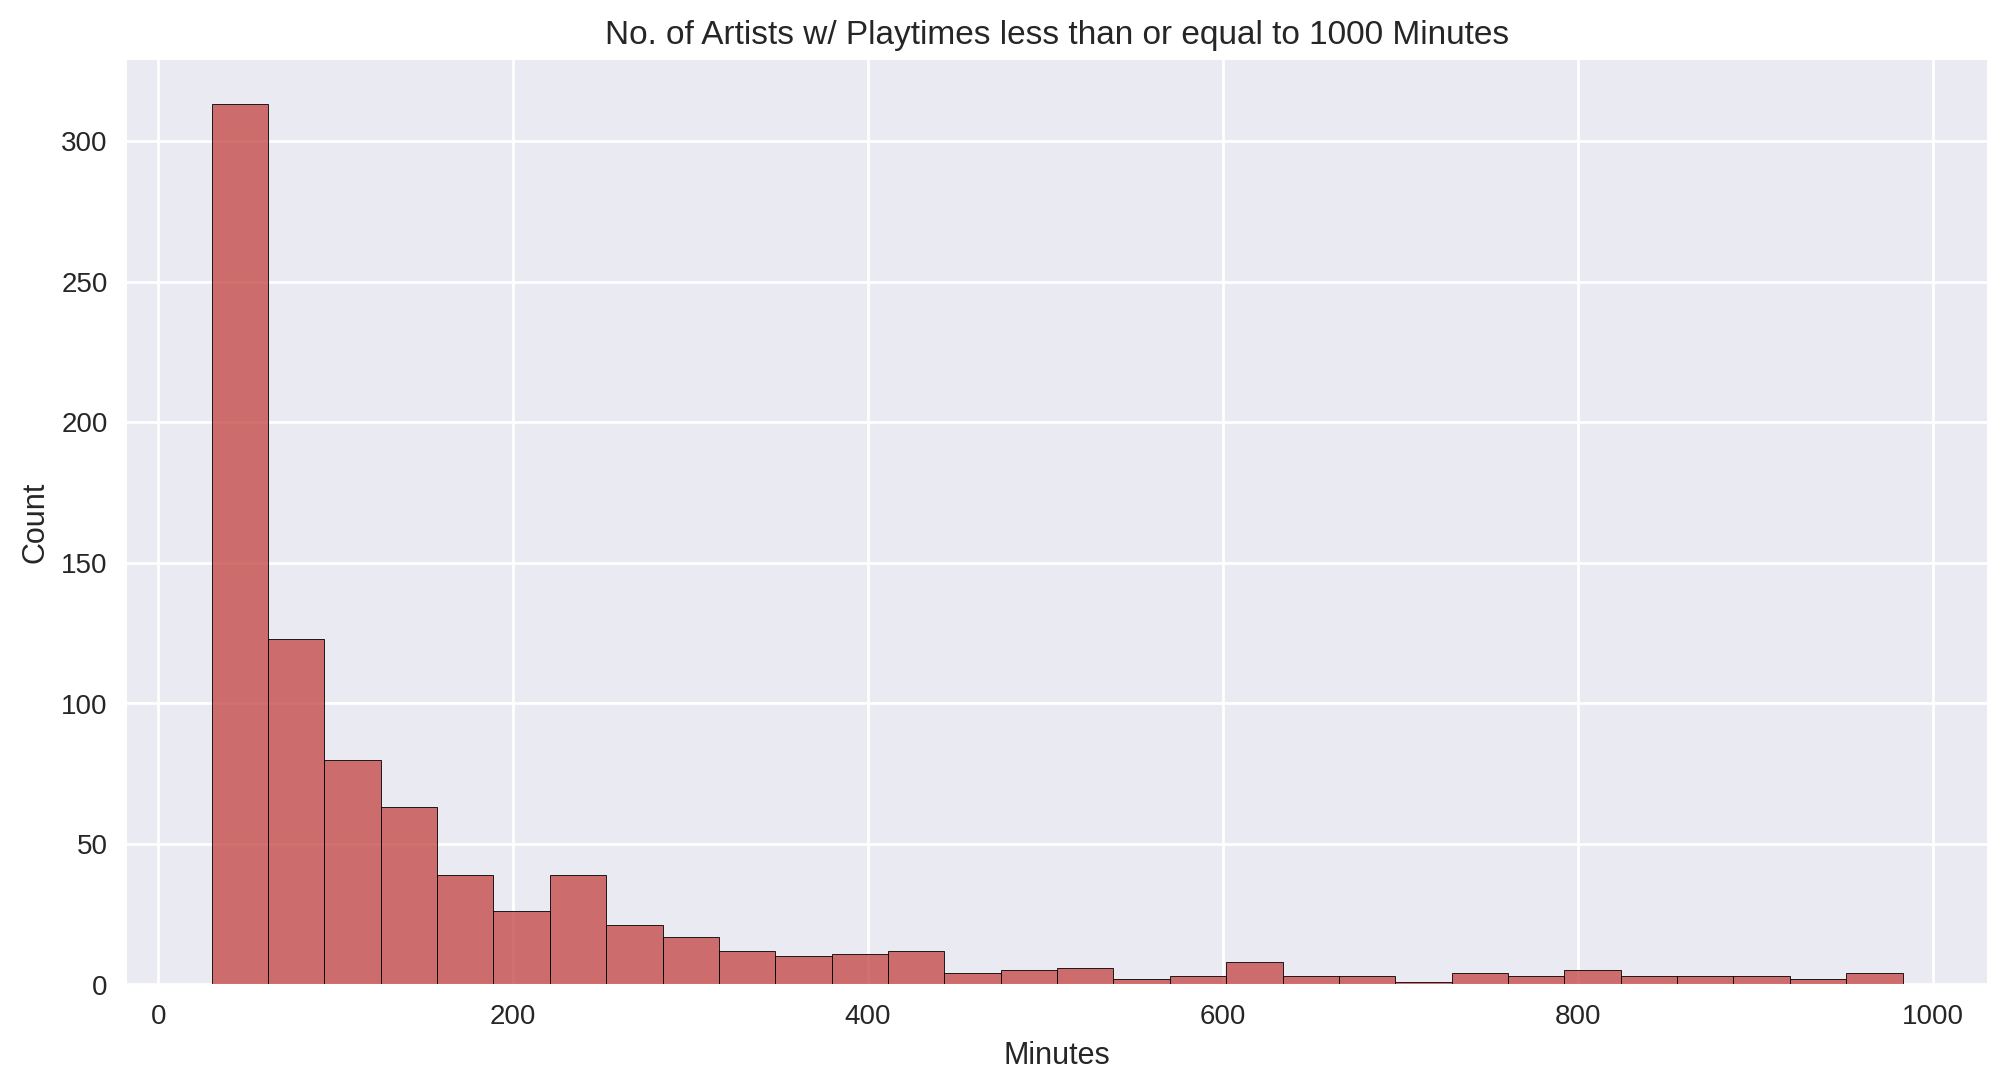

In [ ]:
#Plotting the number of artists with a playtime less than or equal to a 1000 minutes
print("The top 5 artist with Playtime <= 1000 minutes:")
print()
print(artist_tracker[artist_tracker["Minutes"] <= 1000][0:5])
print()

fig, ax = plt.subplots(1, 1, figsize=(12,6))

sns.histplot(artist_tracker[artist_tracker["Minutes"] <= 1000 ], x='Minutes', color='#C3423F', ax=ax)
plt.title(f"No. of Artists w/ Playtimes less than or equal to {1000} Minutes")
plt.show()

The top 5 artist with Playtime > 1000 minutes:

        Artist       Minutes       Hours       Days
0   The Weeknd  50059.321333  834.322022  34.763418
1       Khalid  20822.995617  347.049927  14.460414
2         Kygo  15621.056550  260.350942  10.847956
3        Drake  14196.610883  236.610181   9.858758
4  Post Malone   7775.800600  129.596677   5.399862



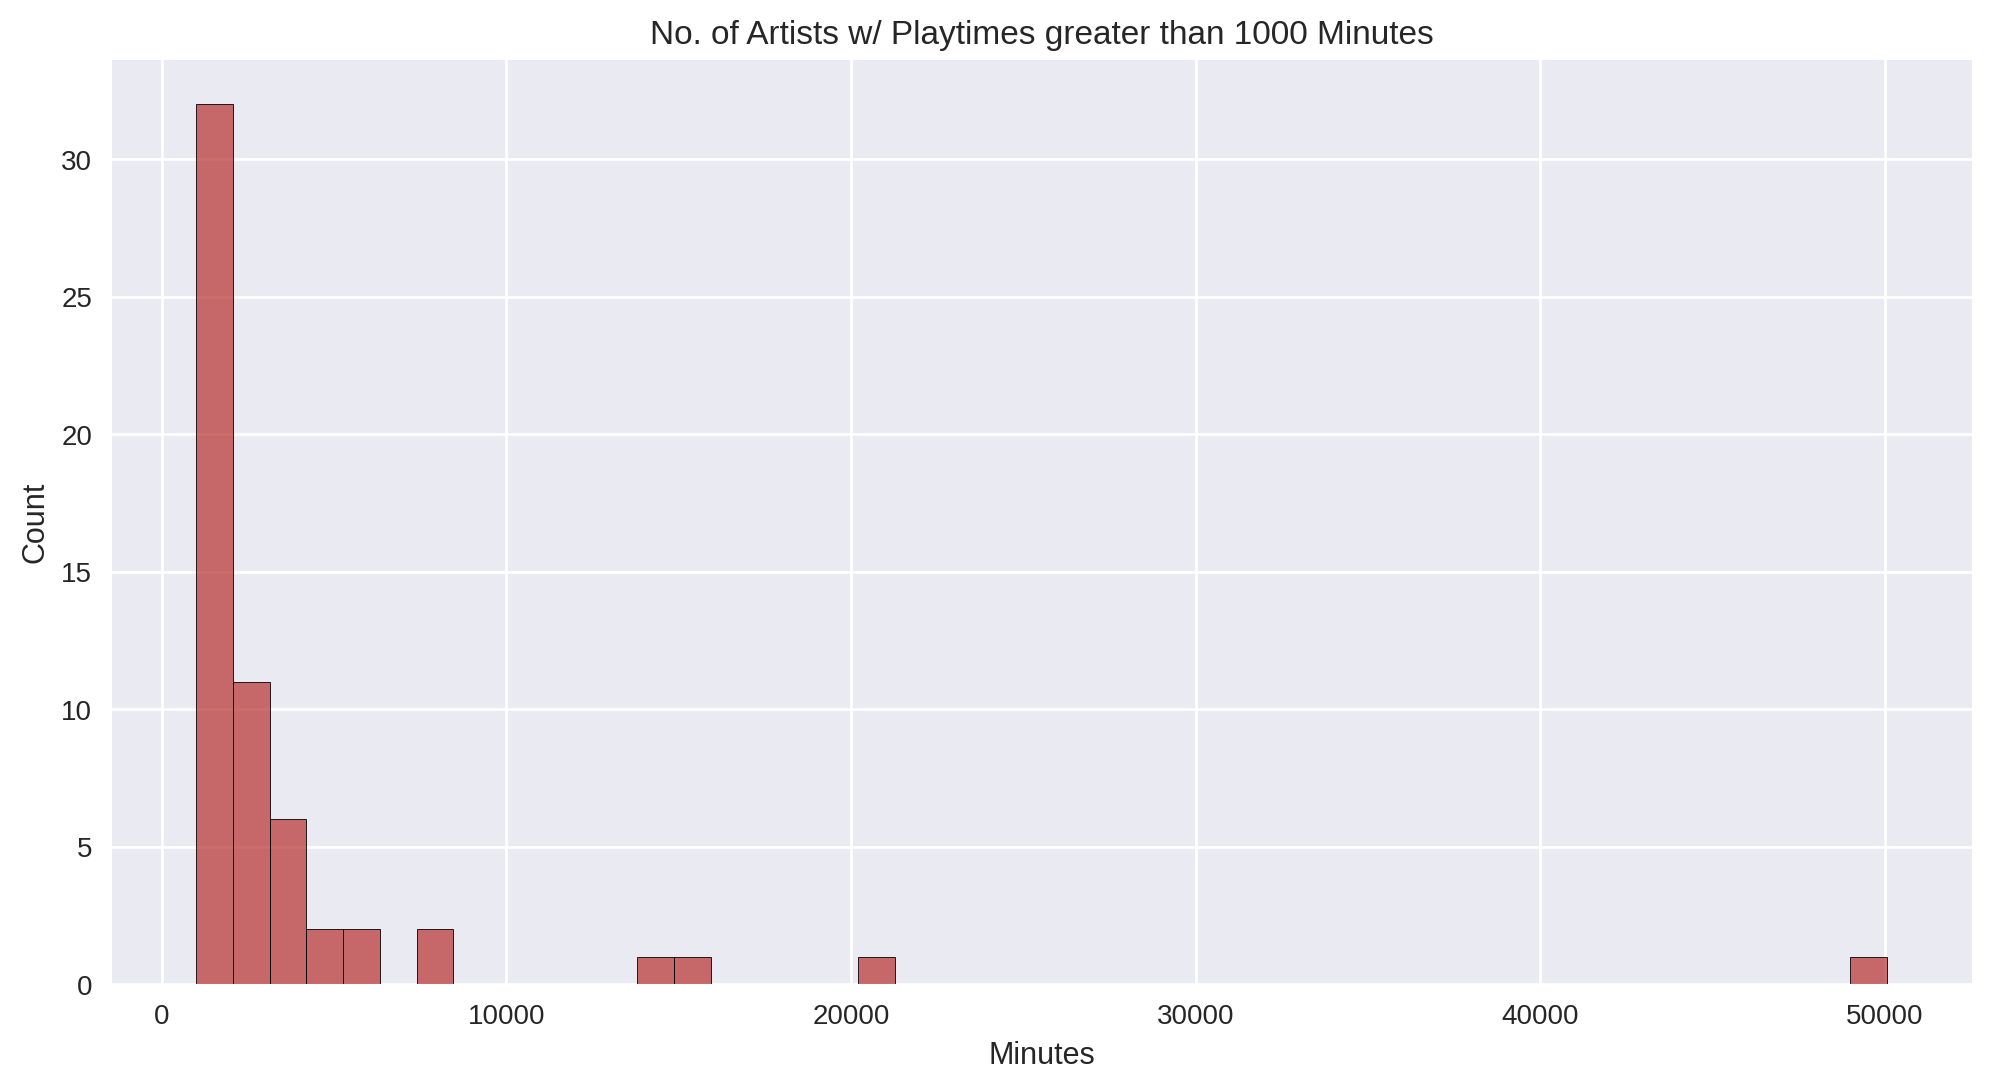

In [ ]:
#Plotting the number of artists with a playtime greater than 1000 minutes
print("The top 5 artist with Playtime > 1000 minutes:")
print()
print(artist_tracker[artist_tracker["Minutes"] > 1000][0:5])
print()

fig, ax = plt.subplots(1, 1, figsize=(12,6))

sns.histplot(artist_tracker[artist_tracker["Minutes"] > 1000], x='Minutes', color='#BA3D3B', ax=ax)
plt.title(f"No. of Artists w/ Playtimes greater than {1000} Minutes")
plt.show()

### Functions

In [ ]:
#To determine and plot the top 10 artists for a particular year

def top_10(year):

  top_10_df = top_10_all[top_10_all['Year'] == year]

  fig, ax = plt.subplots(1, 1, figsize=(10,6))

  ax.barh(y=top_10_df['Artist'], width=top_10_df["Minutes"], color='#374A67')
  ax.set_xlabel("Minutes")
  ax.set_ylabel("Artist")
  ax.set_title("Top 10 Artist's Playtimes in Hours in {}".format(year))
  ax.yaxis.set_inverted(True)
  plt.show()

  print()
  print(top_10_df)

  return


In [ ]:
# To plot the listening trends of select artists over a particular time period

def over_the_years (start_year, end_year, artists):
  artist_by_years_custom = artist_years[artist_years['Year'] >= start_year]
  artist_by_years_custom = artist_by_years_custom[artist_by_years_custom['Year'] <= end_year]

  colors=['#2596be','#9925be','#be4d25','#49be25']
  i=0
  names = ''

  fig, ax = plt.subplots(1, 1, figsize=(12,6))

  for artist in artists:
    sns.lineplot(x='Year', y="Hours",data = artist_by_years_custom[artist_by_years_custom['Artist']== artist],
                  label=artist, marker='o', color=colors[i], ax=ax)
    names += artist + ', '
    i += 1

  plt.title("Listening Trends in Hours for {} Between {} & {}".format(names, start_year, end_year))
  plt.show()

In [ ]:
#To plot the top 5 artists and tracks for a specific month and their shares of the monthly listening time

def top5_month(month, year):

  t5_artists = monthly_top5_artists[(monthly_top5_artists["Year"] == year) & (monthly_top5_artists["Month"] == month)][0:5]
  t5_tracks = monthly_top5_tracks[(monthly_top5_tracks["Year"] == year) & (monthly_top5_tracks["Month"] == month)][0:5]

  fig, axes = plt.subplots(1, 2, figsize=(10, 4))

  colors = ['#9F6BA0', '#20BF55', '#E1BC29', '#08A4BD', '#F28482']
  axes[1].pie(t5_artists['Minutes'], labels=t5_artists['Artist'], autopct='%1.1f%%', textprops={'fontsize': 10}, colors=colors)
  axes[1].set_title('Top 5 Artists', y=1.1)
  axes[1].axis('equal')

  bars = axes[0].barh(data=t5_tracks, y='Track_name', width='Minutes', color='#004BA8', height=0.5)
  axes[0].set_title('Top 5 Tracks', y=1.1, loc='left')
  axes[0].set_xlabel('Minutes')
  axes[0].yaxis.set_inverted(True)

  fig.suptitle(f'{months[str(month)]} {year}')

  plt.tight_layout()
  plt.show()

  display(t5_tracks[['cover', 'Track_name', 'Artist', 'Minutes']].style.format({'cover':image_display}))

In [124]:
#To plot the top 10 songs by a specific artist

def top_songs_by_artist(artist, max=10):
  data = num_of_unique_songs[num_of_unique_songs['Artist'] == artist][0:max]

  fig, ax = plt.subplots(figsize=(10, 5))

  ax.barh(data=data, y='Track_name', width='Minutes_Played', color='#37718E')
  ax.yaxis.set_inverted(True)
  ax.set_title(f'Top {max} Songs by {artist}', loc='left')
  ax.set_xlabel('Minutes')

  plt.show()

  display(num_of_unique_songs[num_of_unique_songs['Artist'] == artist]
   [['cover', 'Track_name', 'Album', 'Minutes_Played', 'release_date']].head(max).style.format({'cover':image_display}))

## Data Visualization

### Most Recent Statistics

Top 10 artists in 2025, as of 12th October, 2025.

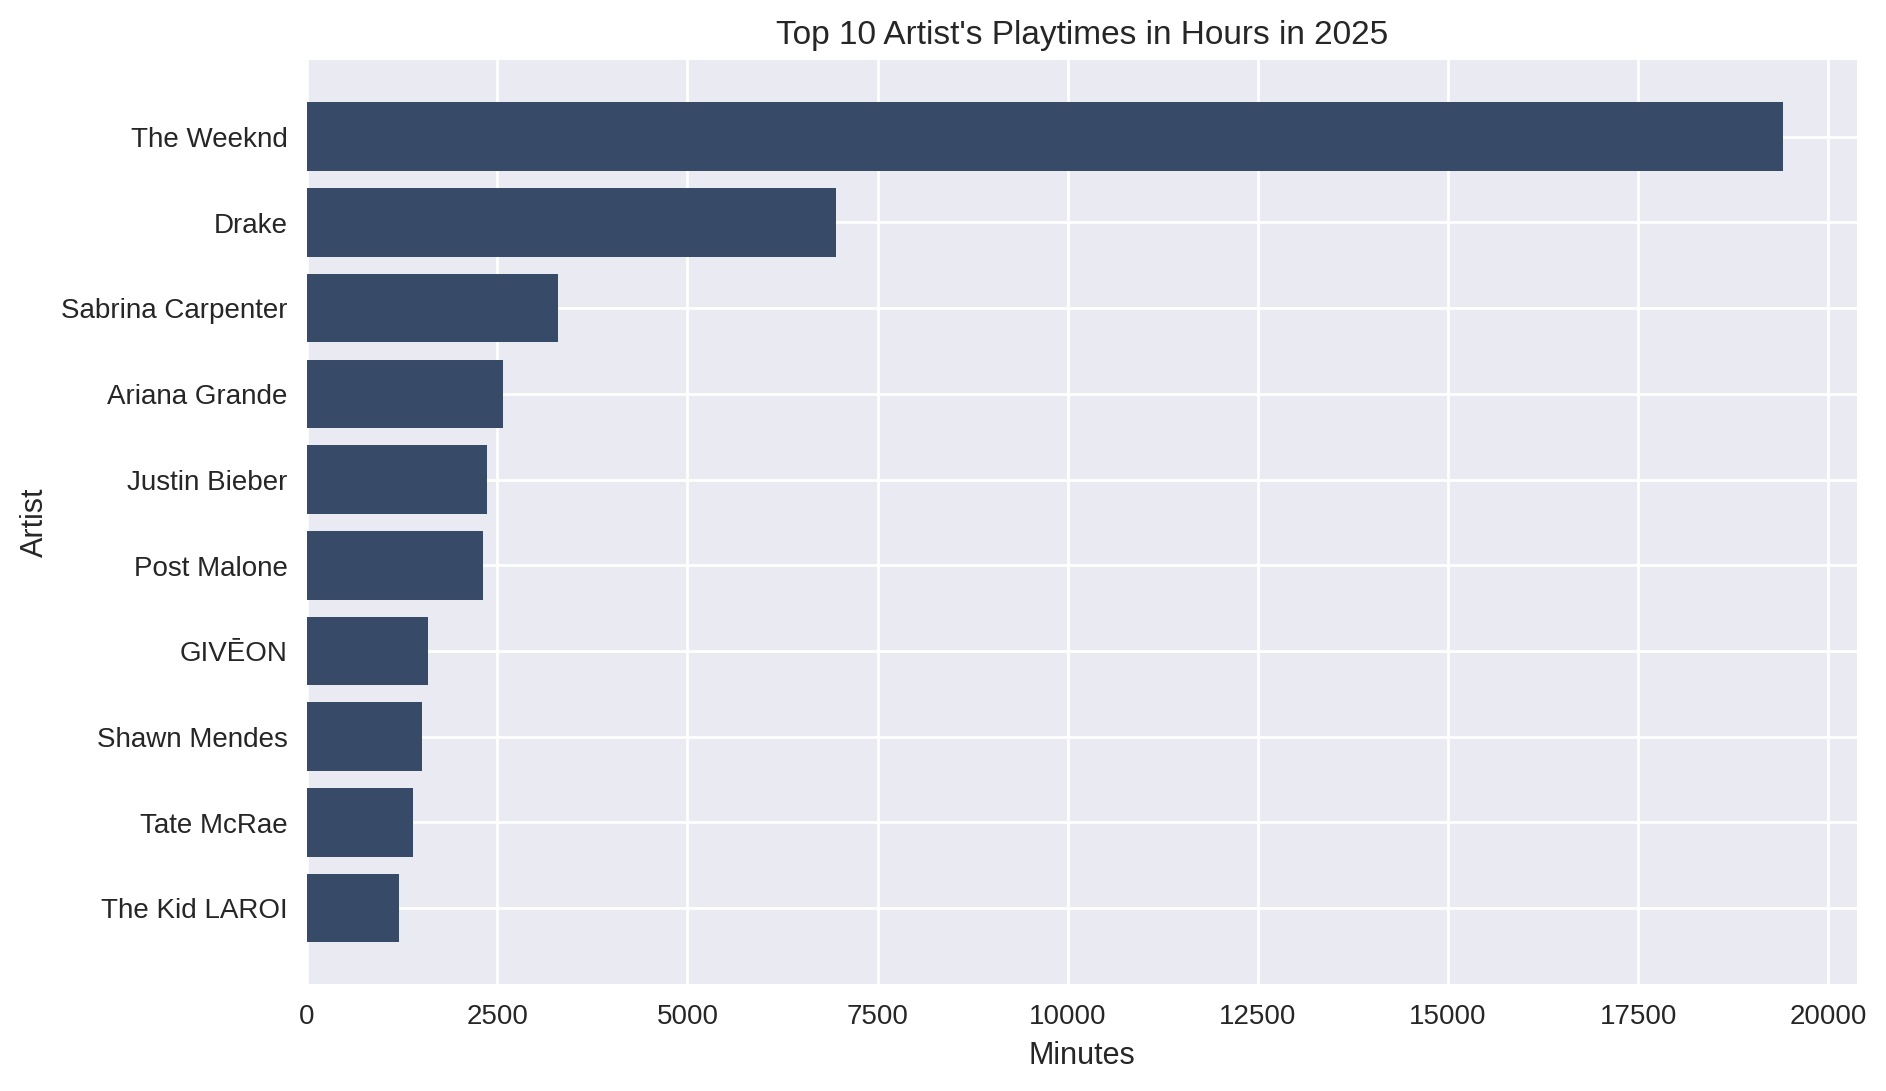


               Artist  Times_listened       Minutes       Hours  Year
70         The Weeknd            8188  19407.854300  323.464238  2025
71              Drake            3473   6956.485683  115.941428  2025
72  Sabrina Carpenter            2112   3298.473017   54.974550  2025
73      Ariana Grande            1605   2577.983067   42.966384  2025
74      Justin Bieber            1665   2363.757500   39.395958  2025
75        Post Malone            1837   2317.308033   38.621801  2025
76             GIVĒON             960   1593.710233   26.561837  2025
77       Shawn Mendes             876   1516.005533   25.266759  2025
78         Tate McRae            1016   1397.911750   23.298529  2025
79      The Kid LAROI             840   1211.983500   20.199725  2025


In [ ]:
top_10(2025)  #Changing the year inside the function will display top 10 artists for the respective year

Top 5 artists and songs for September 2025

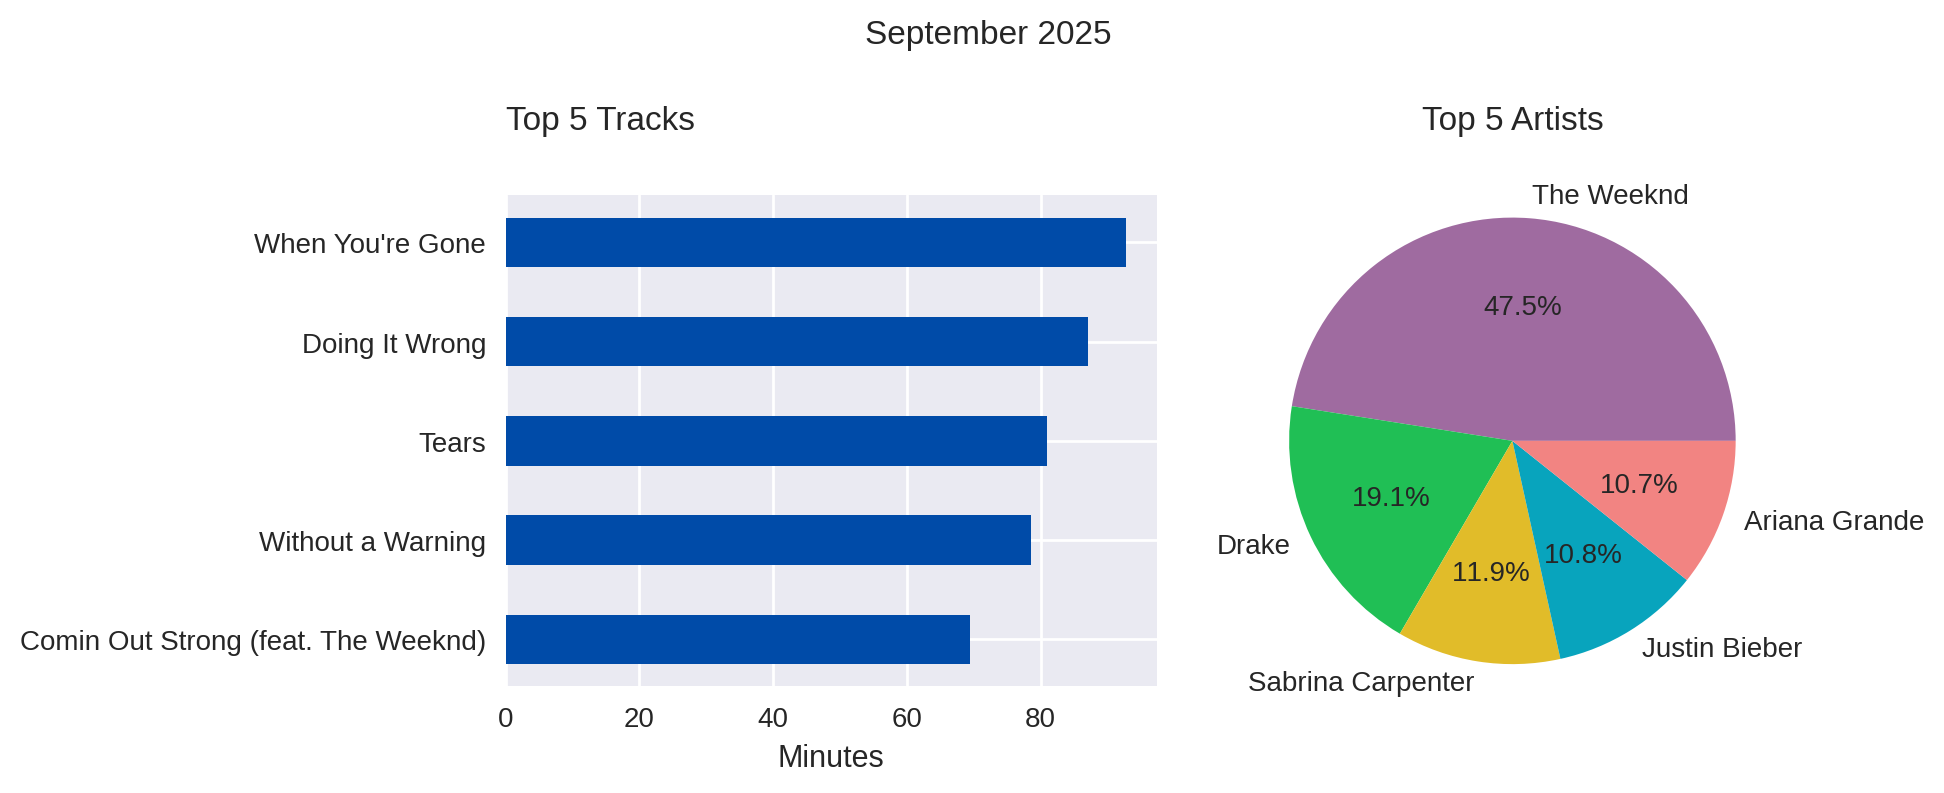

,cover,Track_name,Artist,Minutes
13382,,When You're Gone,Shawn Mendes,92.701933
13383,,Doing It Wrong,Drake,87.100150
13384,,Tears,Sabrina Carpenter,80.953983
13385,,Without a Warning,The Weeknd,78.541500
13386,,Comin Out Strong (feat. The Weeknd),Future,69.407267


In [ ]:
top5_month(9, 2025)  #Changing the month and year inside the function will display top 5 artists and songs for the respective period

### Data By Years

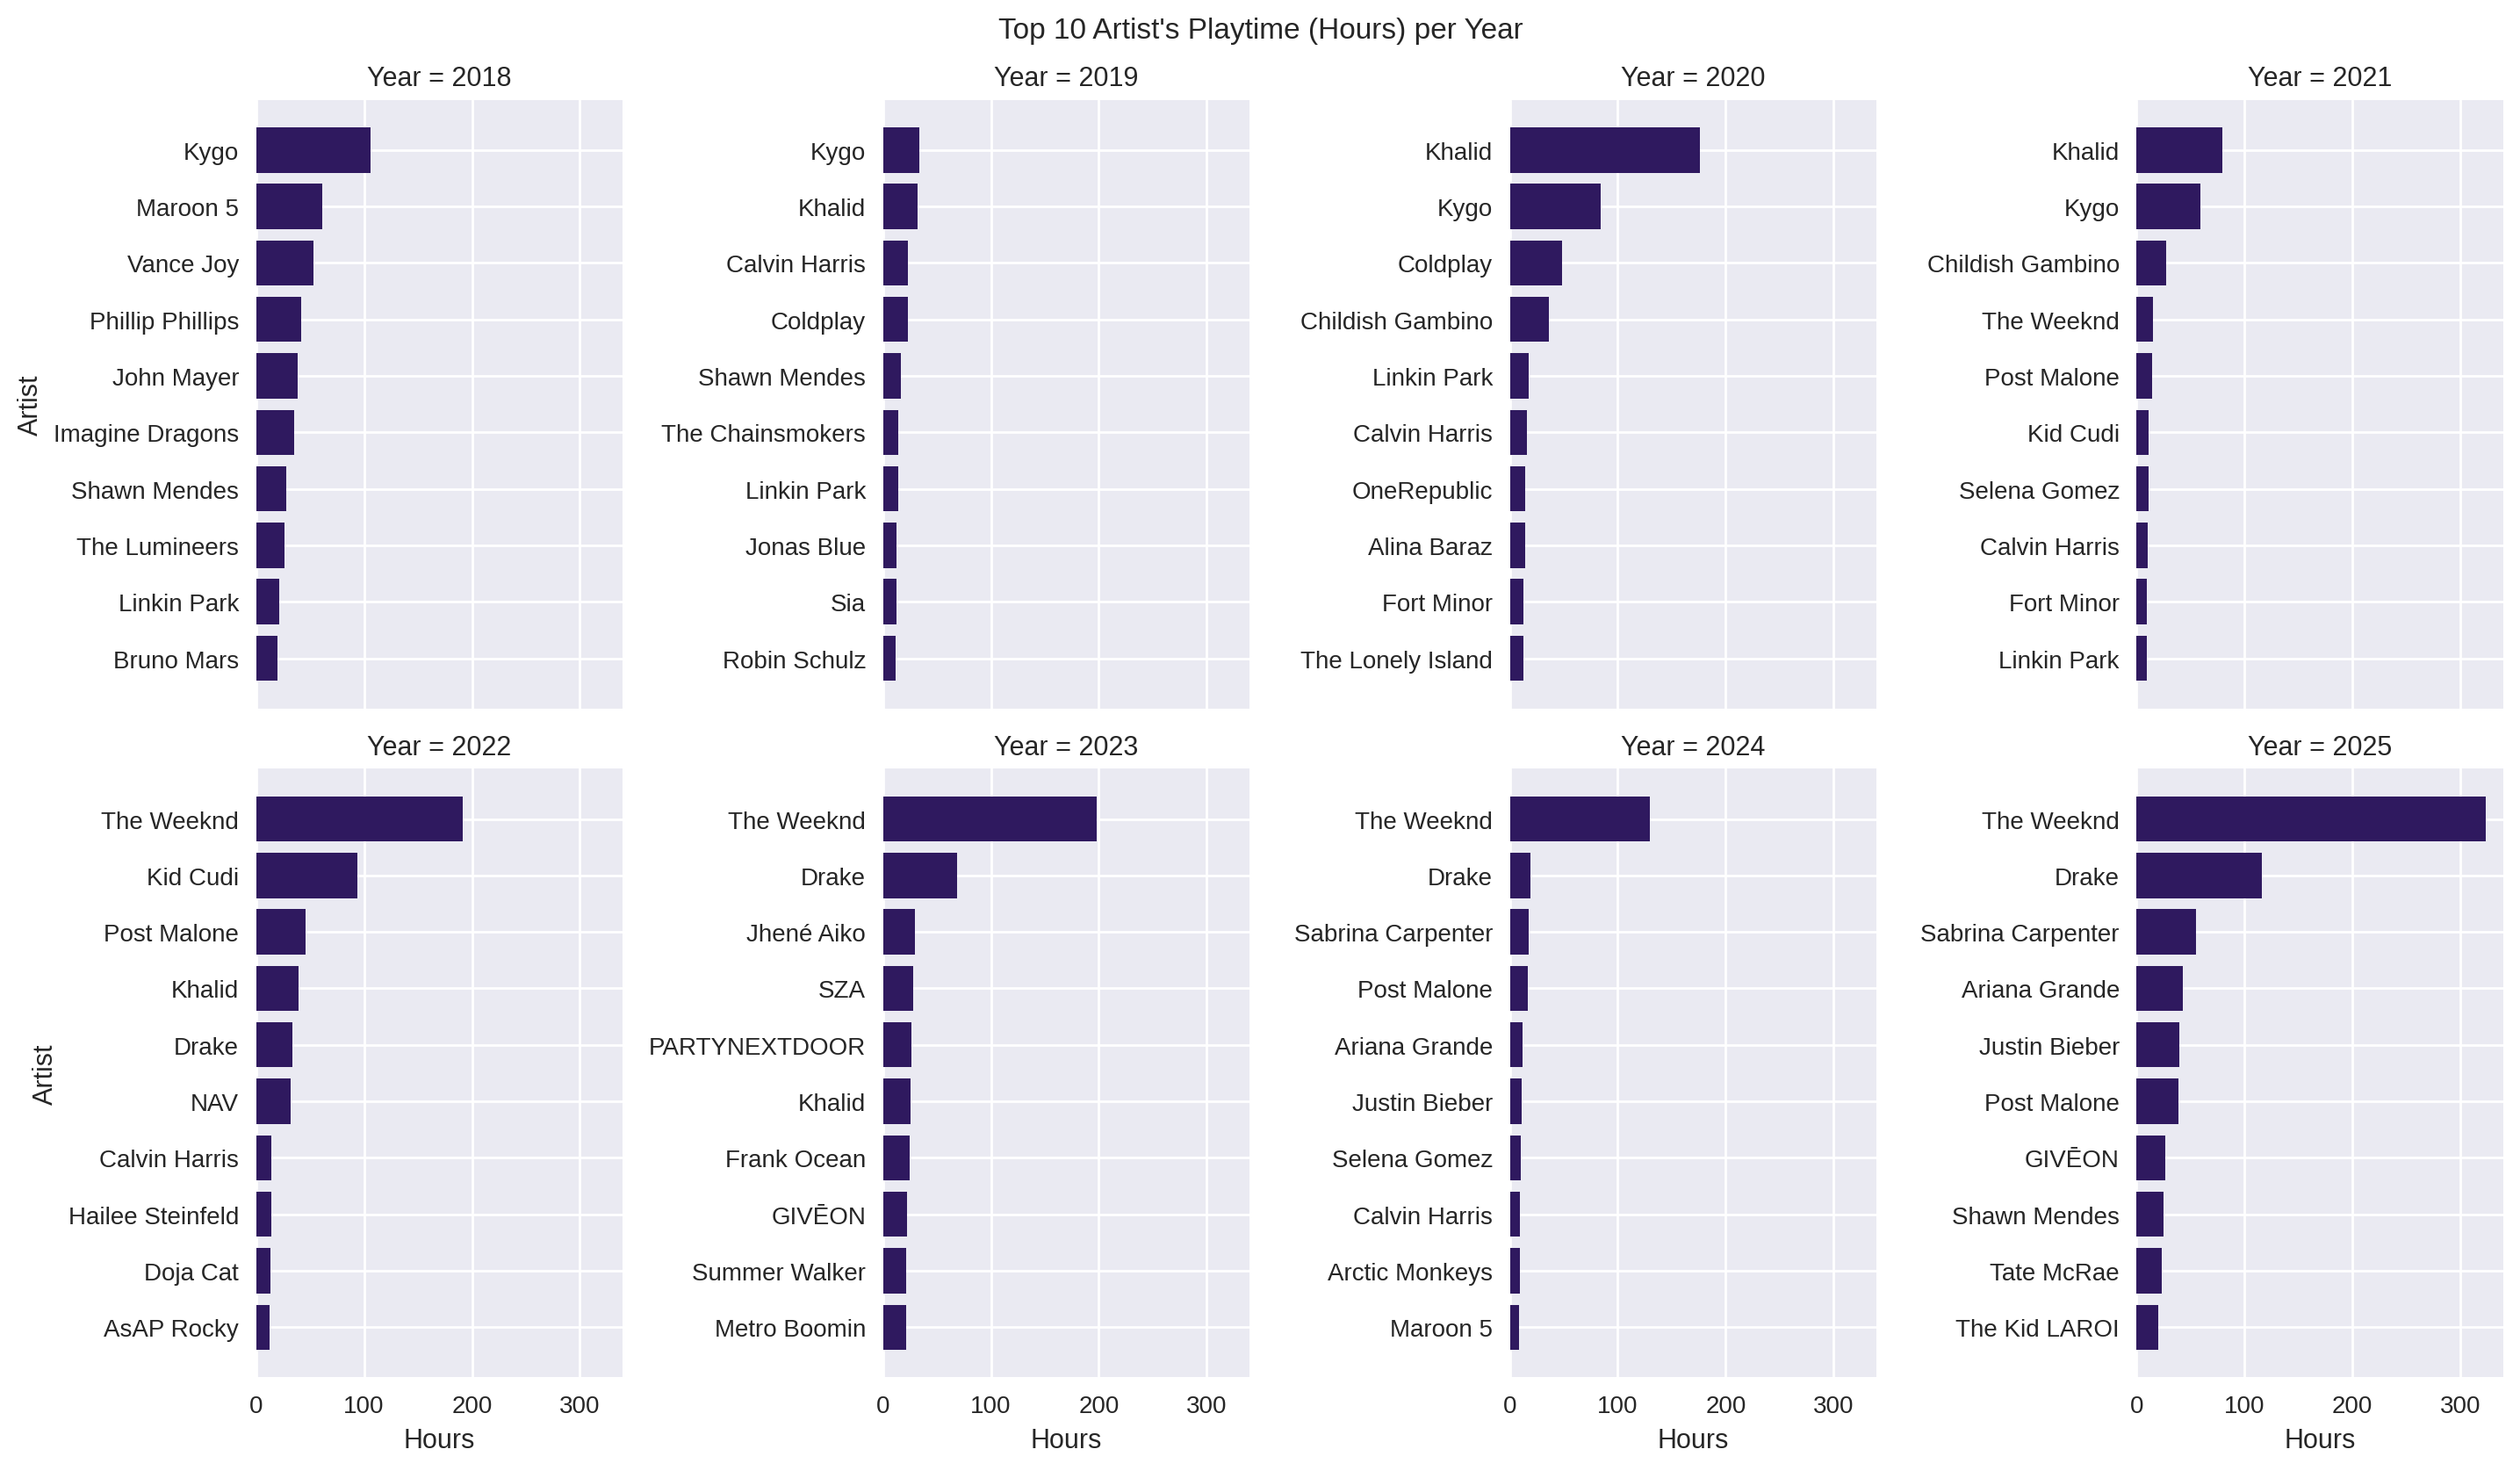

In [ ]:
#Plotting my top 10 artists (according to the minutes played) for every year since 2018

a = sns.FacetGrid(data=top_10_all,col="Year",
                  sharey=False, sharex=True, col_wrap=4, height=4.25, aspect=0.85) #Kept the x axis common to allow for a better comparision among the years

a.map(plt.barh, 'Artist', 'Hours',color='#2F195F')

for ax in a.axes:
    ax.invert_yaxis()

a.set_axis_labels(x_var='Hours', y_var='Artist')
a.fig.suptitle("Top 10 Artist's Playtime (Hours) per Year")
plt.tight_layout()
plt.show()

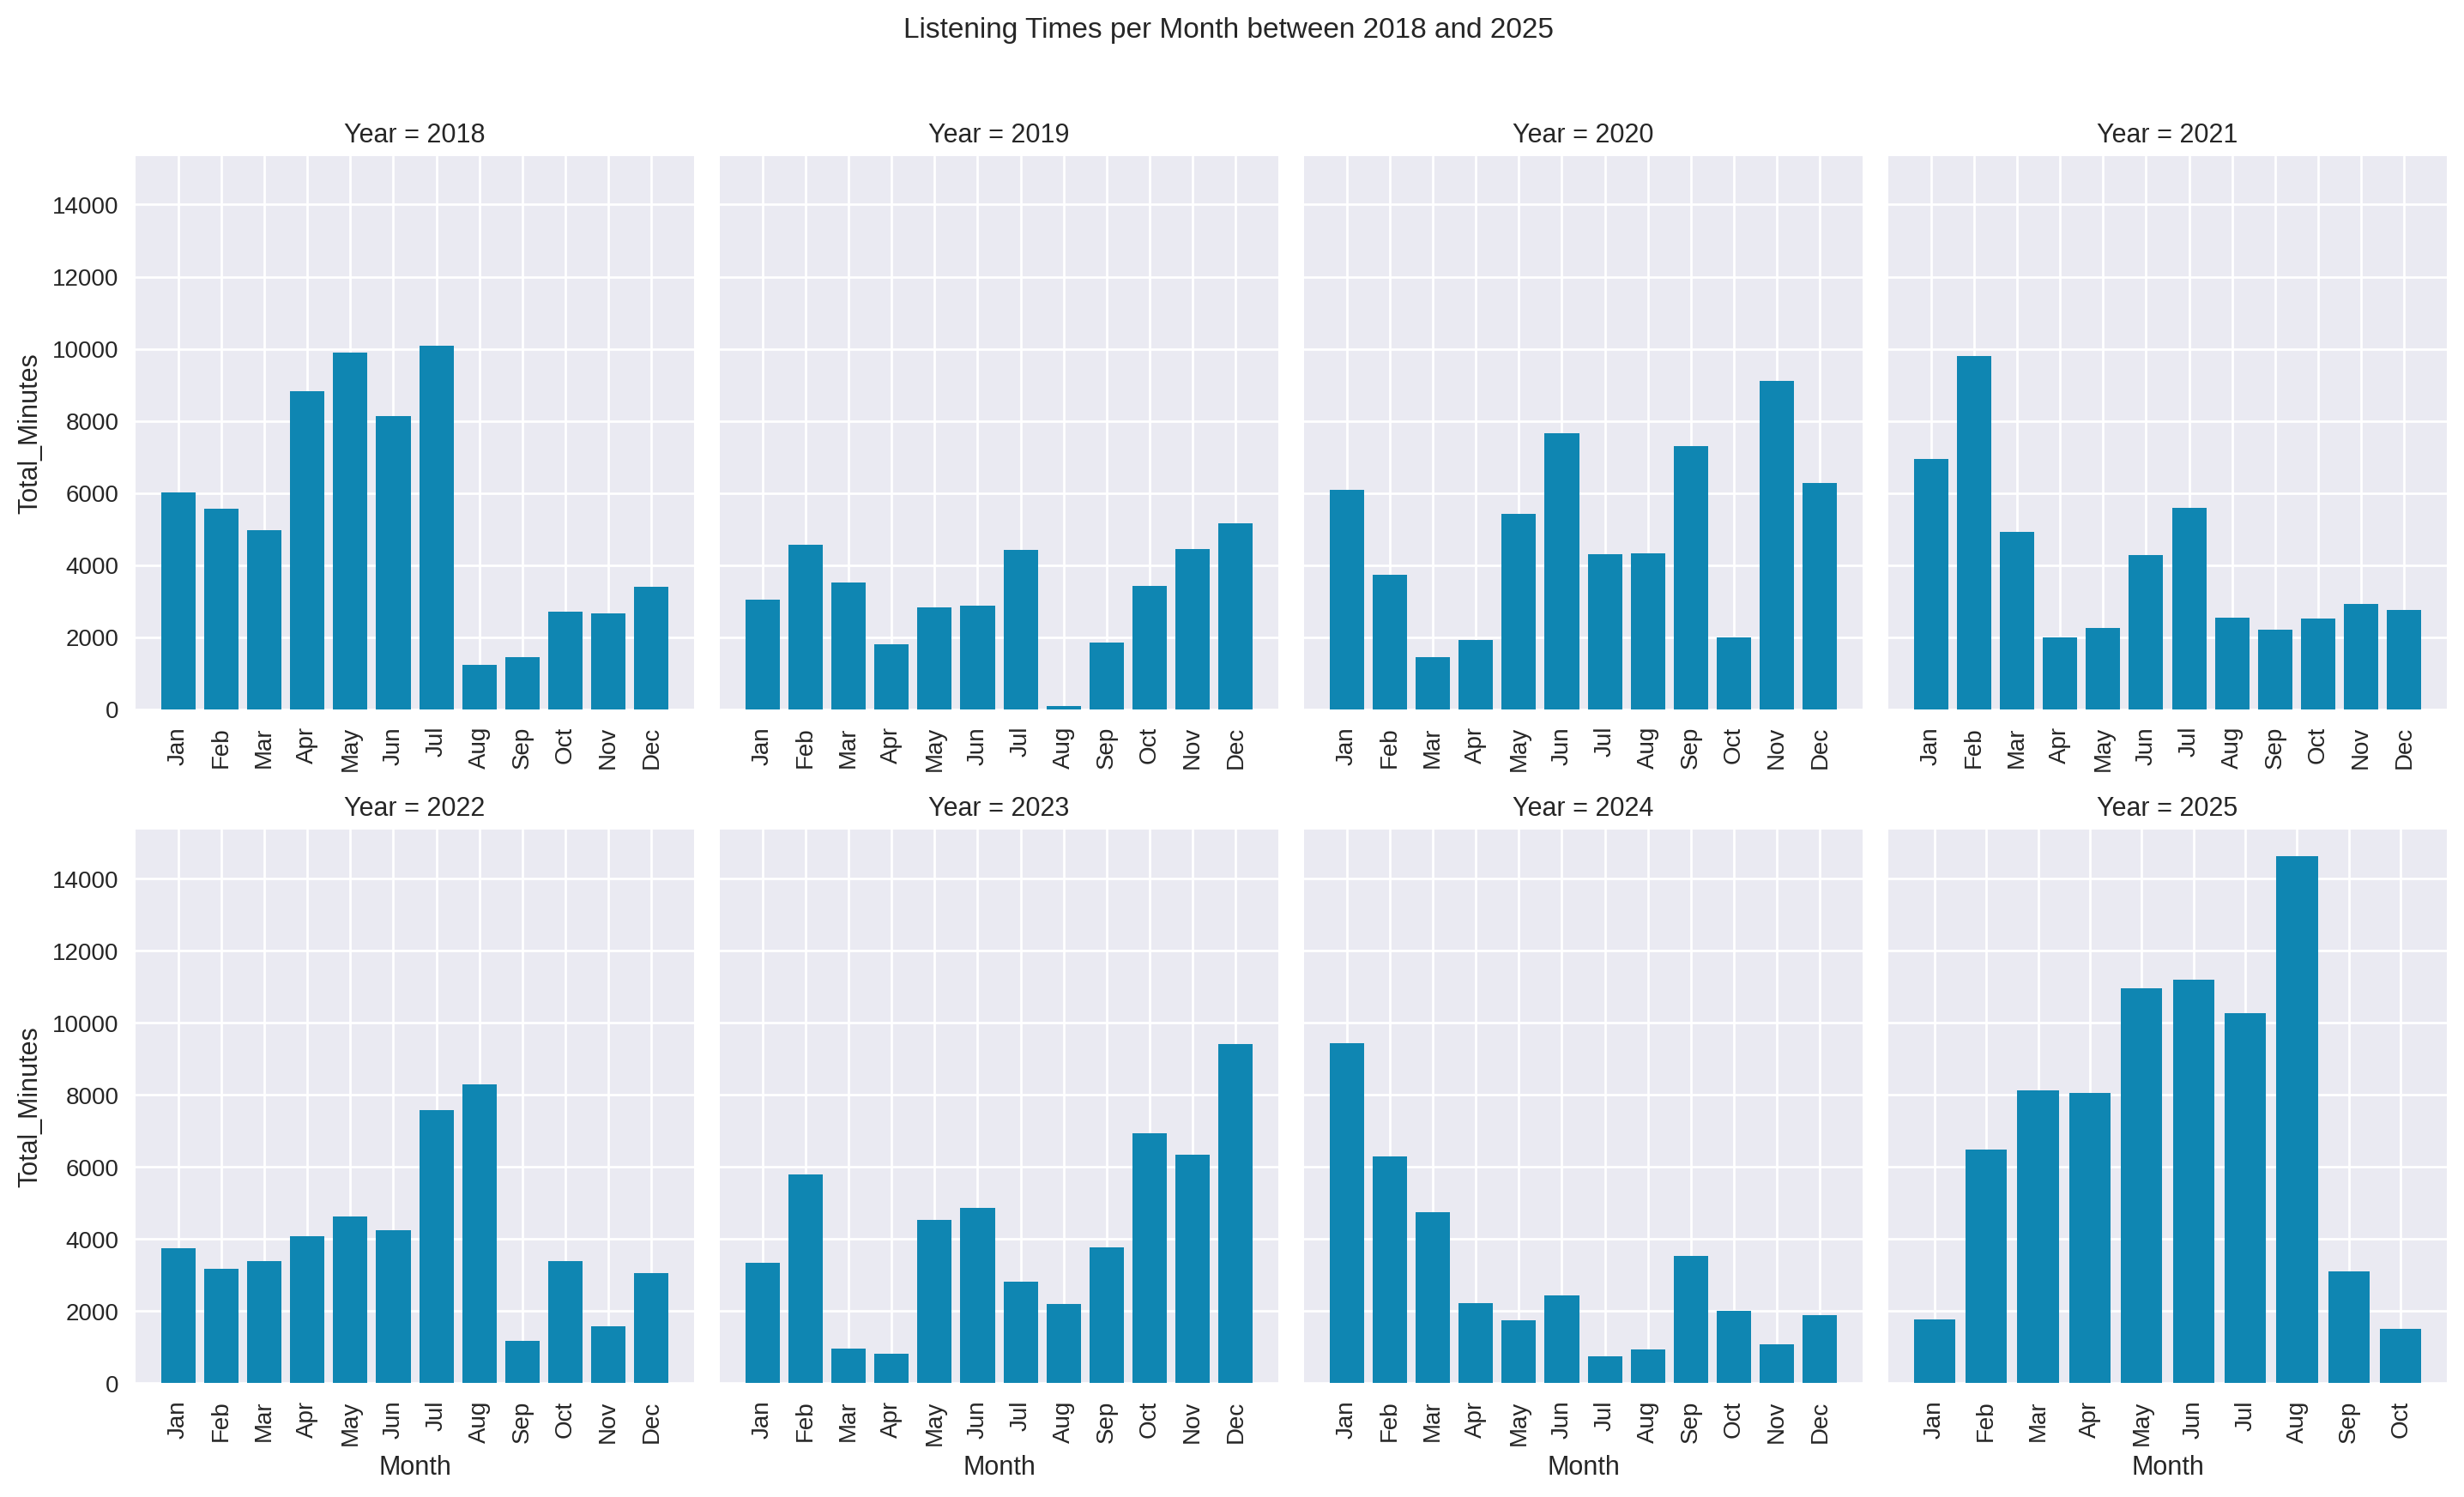

In [ ]:
#Plotting my total music playtime in minutes per month for every year since 2018

b = sns.FacetGrid(playtime_by_month, col='Year', col_wrap=4, sharex=False, sharey=True, height=4.25, aspect=0.85)
b.map(plt.bar, 'Month', 'Total_Minutes', color='#0f86b2')
b.set_xticklabels(rotation=90)
b.fig.suptitle("Listening Times per Month between {} and {} ".format(playtime_by_month["Year"].min(),
                                  playtime_by_month["Year"].max()), y=1.02, size=12)

plt.tight_layout()
plt.show()


### Artist Listening Progression

Displaying the trends in listening times for select artists over a defined range of years

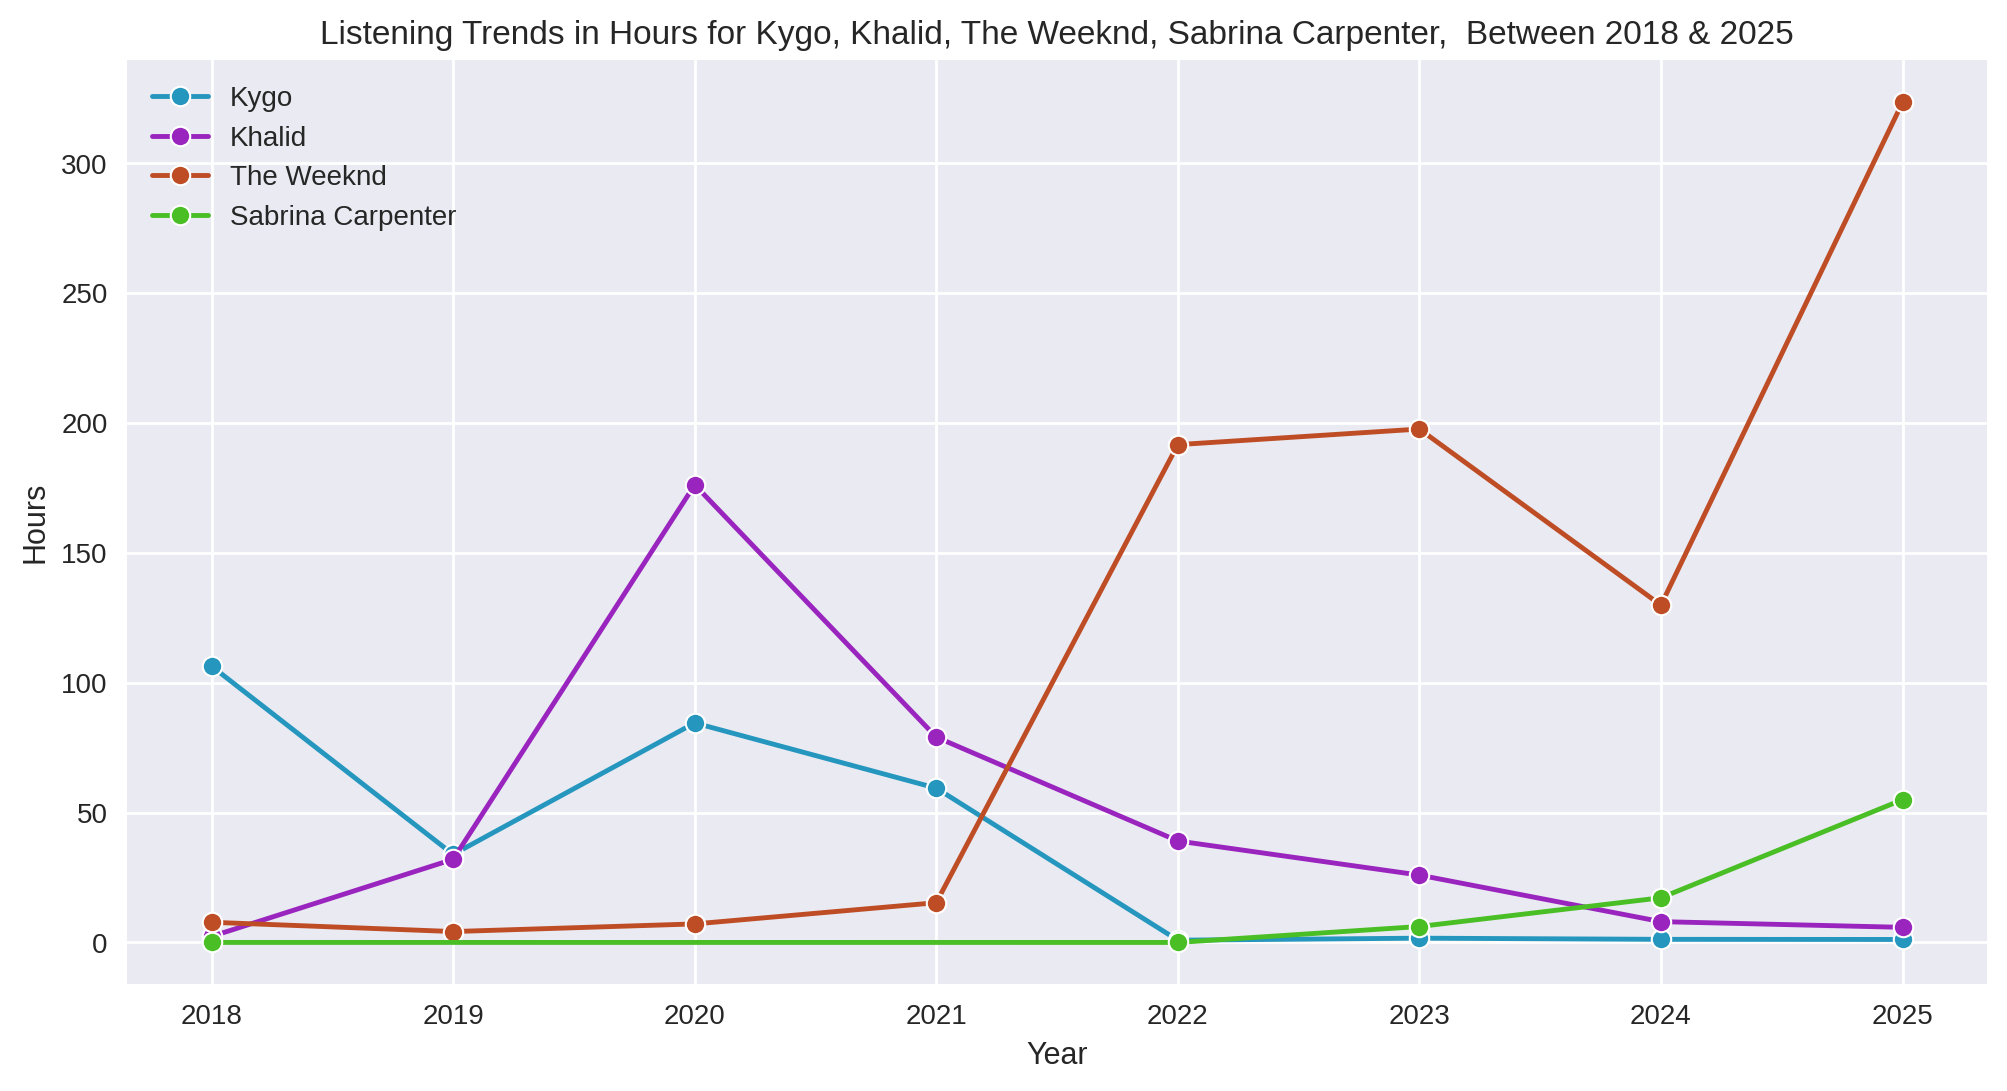

In [ ]:
#Plotting listening trends for select artists between 2018 and 2025

over_the_years(2018, 2025, ["Kygo", "Khalid" ,"The Weeknd", "Sabrina Carpenter"])

I chose to view the trends of these artists as Kygo and Khalid were my top 2 artists from 2019 to 2021, and The Weeknd and Sabrina Carpenter were in my top 3 since 2024.

A trend worth investigating here will be the relationship between the release of new music (or the lack thereof) and the increases and decreases in playtime. This investigation will be conducted later and this notebook will updated accordingly.

---



Displaying the top 10 songs by a select artist.

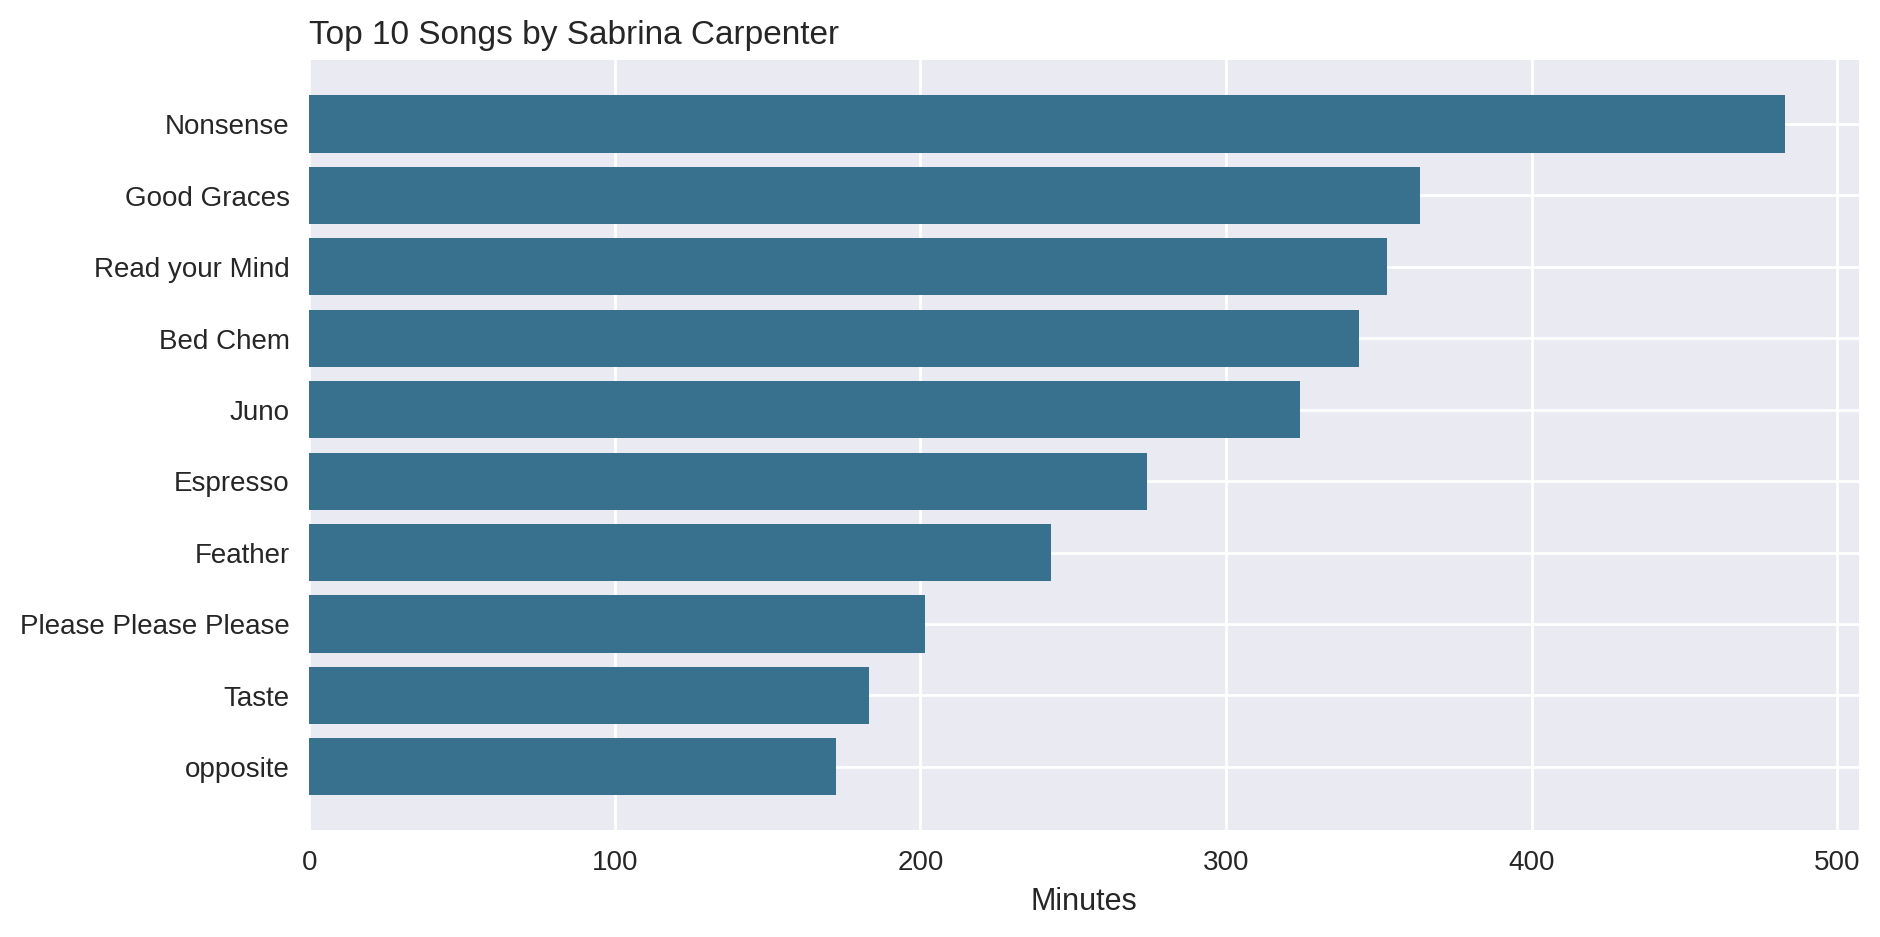

,cover,Track_name,Album,Minutes_Played,release_date
132,,Nonsense,emails i can't send,482.986183,2022-07-15
226,,Good Graces,Short n' Sweet,363.531133,2024-08-23
236,,Read your Mind,emails i can't send,352.480200,2022-07-15
250,,Bed Chem,Short n' Sweet,343.615917,2024-08-23
273,,Juno,Short n' Sweet,324.118517,2024-08-23
349,,Espresso,Espresso,274.277450,2024-04-12
409,,Feather,emails i can’t send fwd:,242.858100,2023-03-17
505,,Please Please Please,Please Please Please,201.365400,2024-06-06
550,,Taste,Short n' Sweet,183.013217,2024-08-23
579,,opposite,emails i can’t send fwd:,172.443917,2023-03-17


In [125]:
top_songs_by_artist('Sabrina Carpenter') #Change the artist in the function to find the top 10 songs by them

### Listening Trends

Displaying the change in playtimes in 2025 compared to the previous year.

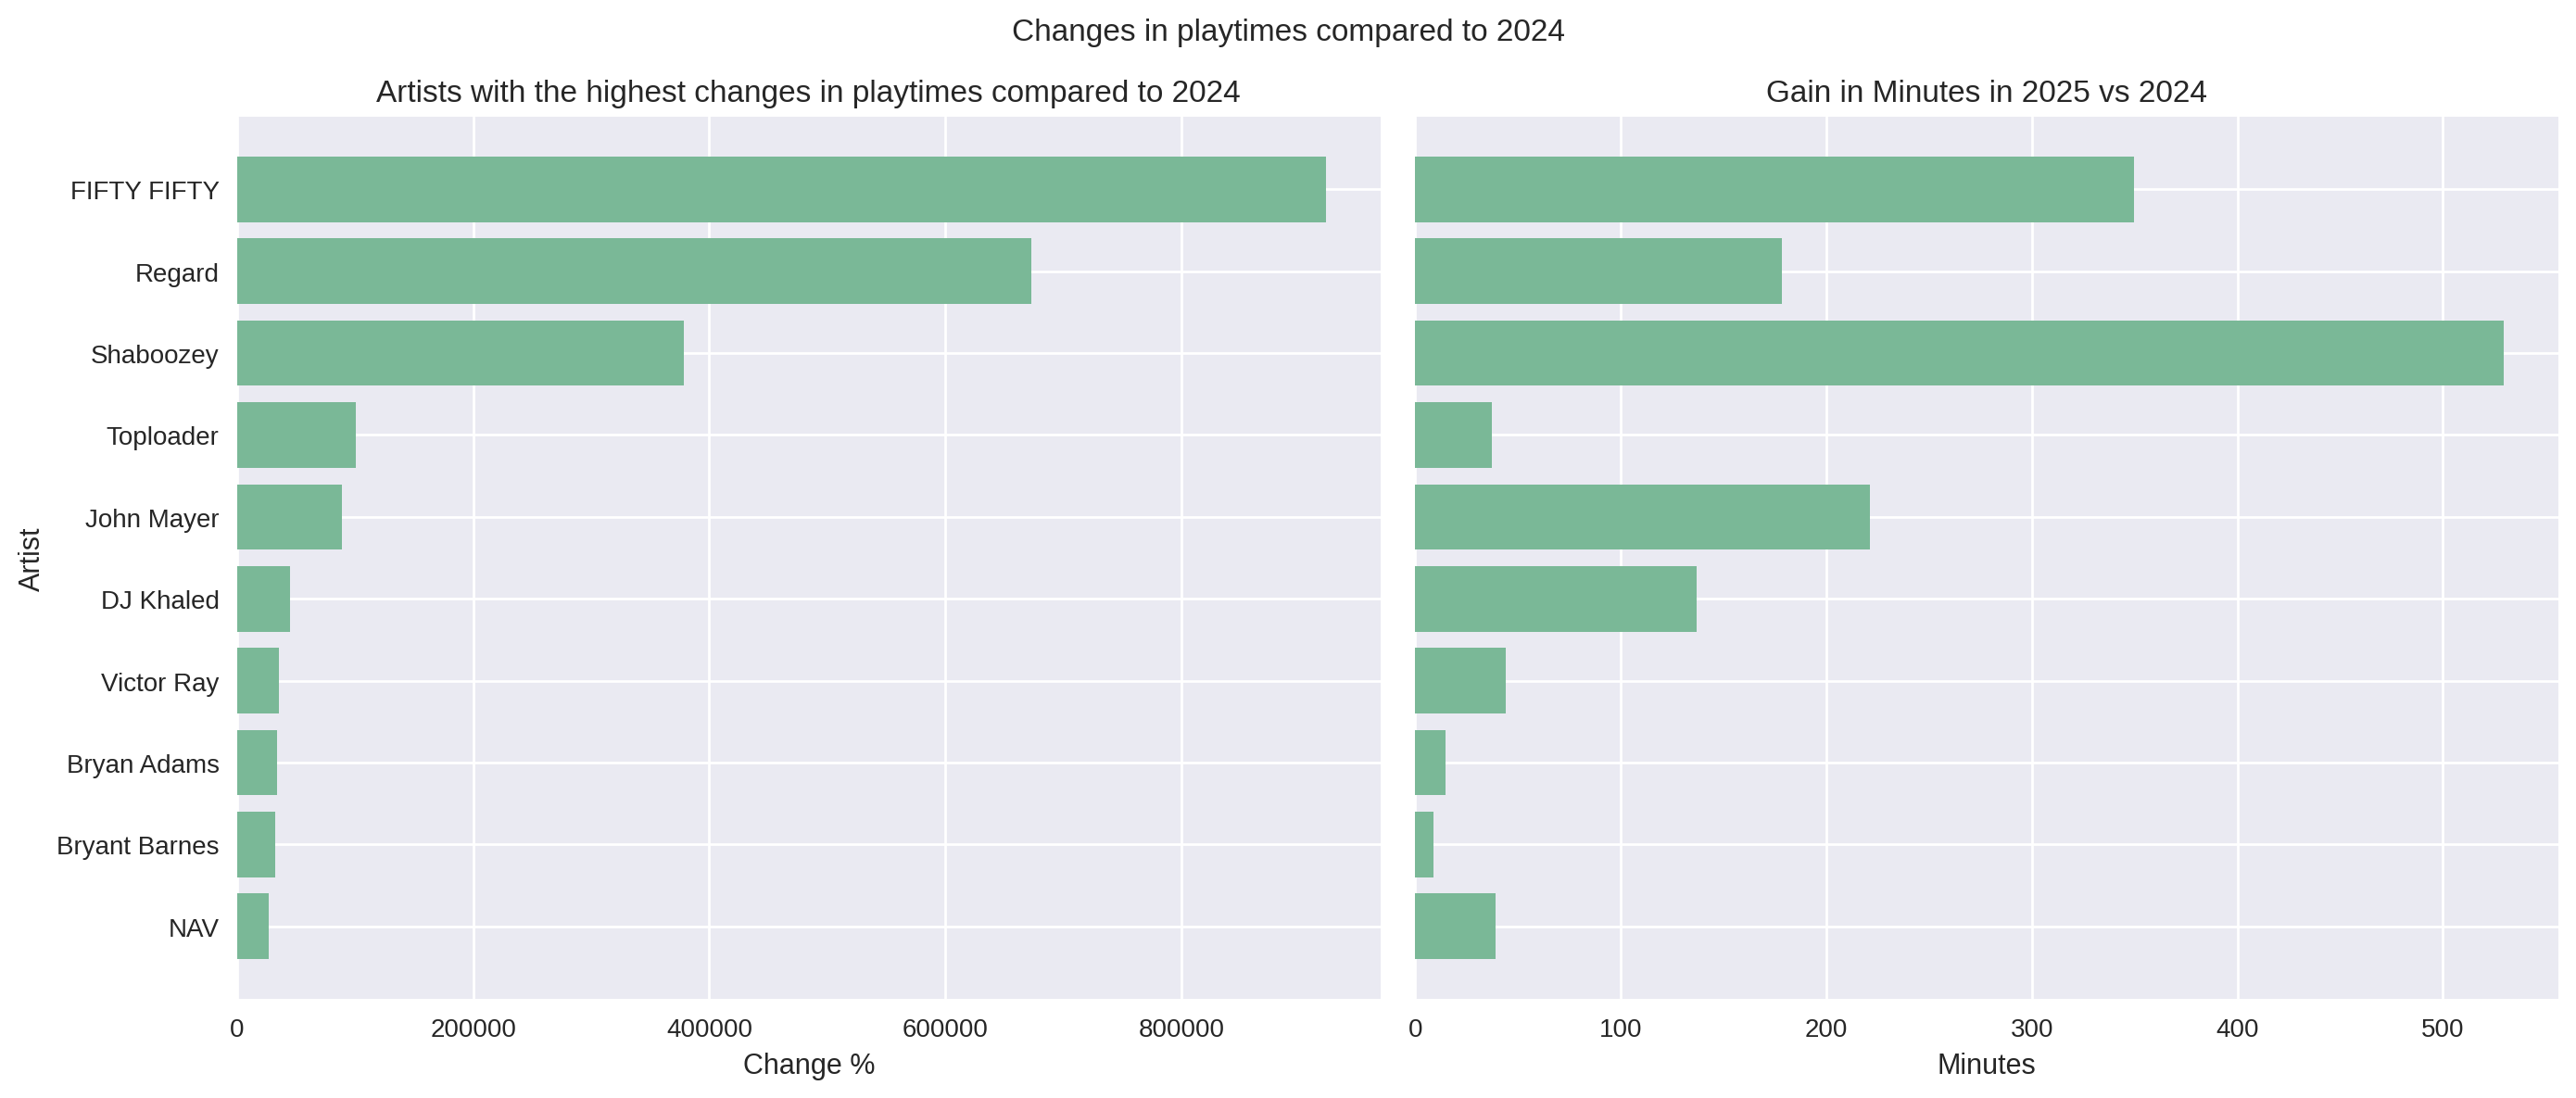

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].barh(data=changes_df[0:10], y='Artist', width='Change_%', color='#7AB897')
ax[0].set_title("Artists with the highest changes in playtimes compared to 2024")
ax[0].set_xlabel('Change %')
ax[0].yaxis.set_inverted(True)
ax[0].set_ylabel("Artist")


comparision_2025 = ax[1].barh(data=changes_df[0:10],  width = changes_df[2025][0:10], y='Artist', color='#7AB897')
ax[1].set_xlabel('Minutes')
ax[1].set_yticklabels('')
ax[1].yaxis.set_inverted(True)
ax[1].set_title("Gain in Minutes in 2025 vs 2024")


plt.suptitle("Changes in playtimes compared to 2024")
plt.tight_layout()
plt.show()

In [ ]:
changes_df[0:10][['Artist',2024, 2025, 'Change_%', 'Minutes Gained']]

,Artist,2024,2025,Change_%,Minutes Gained
1751,FIFTY FIFTY,0.037917,349.810950,922478.329670,349.773033
4510,Regard,0.026500,178.344417,672897.798742,178.317917
4851,Shaboozey,0.139883,529.611050,378509.114738,529.471167
5578,Toploader,0.037233,37.430817,100430.393912,37.393583
2691,John Mayer,0.249783,221.290567,88493.007273,221.040783
1214,DJ Khaled,0.308250,136.968833,44334.333604,136.660583
5723,Victor Ray,0.123900,44.276000,35635.270379,44.152100
779,Bryan Adams,0.043000,14.599550,33852.441860,14.556550
781,Bryant Barnes,0.027400,8.941217,32532.177616,8.913817
3875,NAV,0.146267,39.055017,26601.242024,38.908750


All of the artists above have seen such a drastic change in their playtimes as I had barely played any of their songs in the preceding year.


---



Comparison of changes in playtimes for my top 10 artists in 2025.

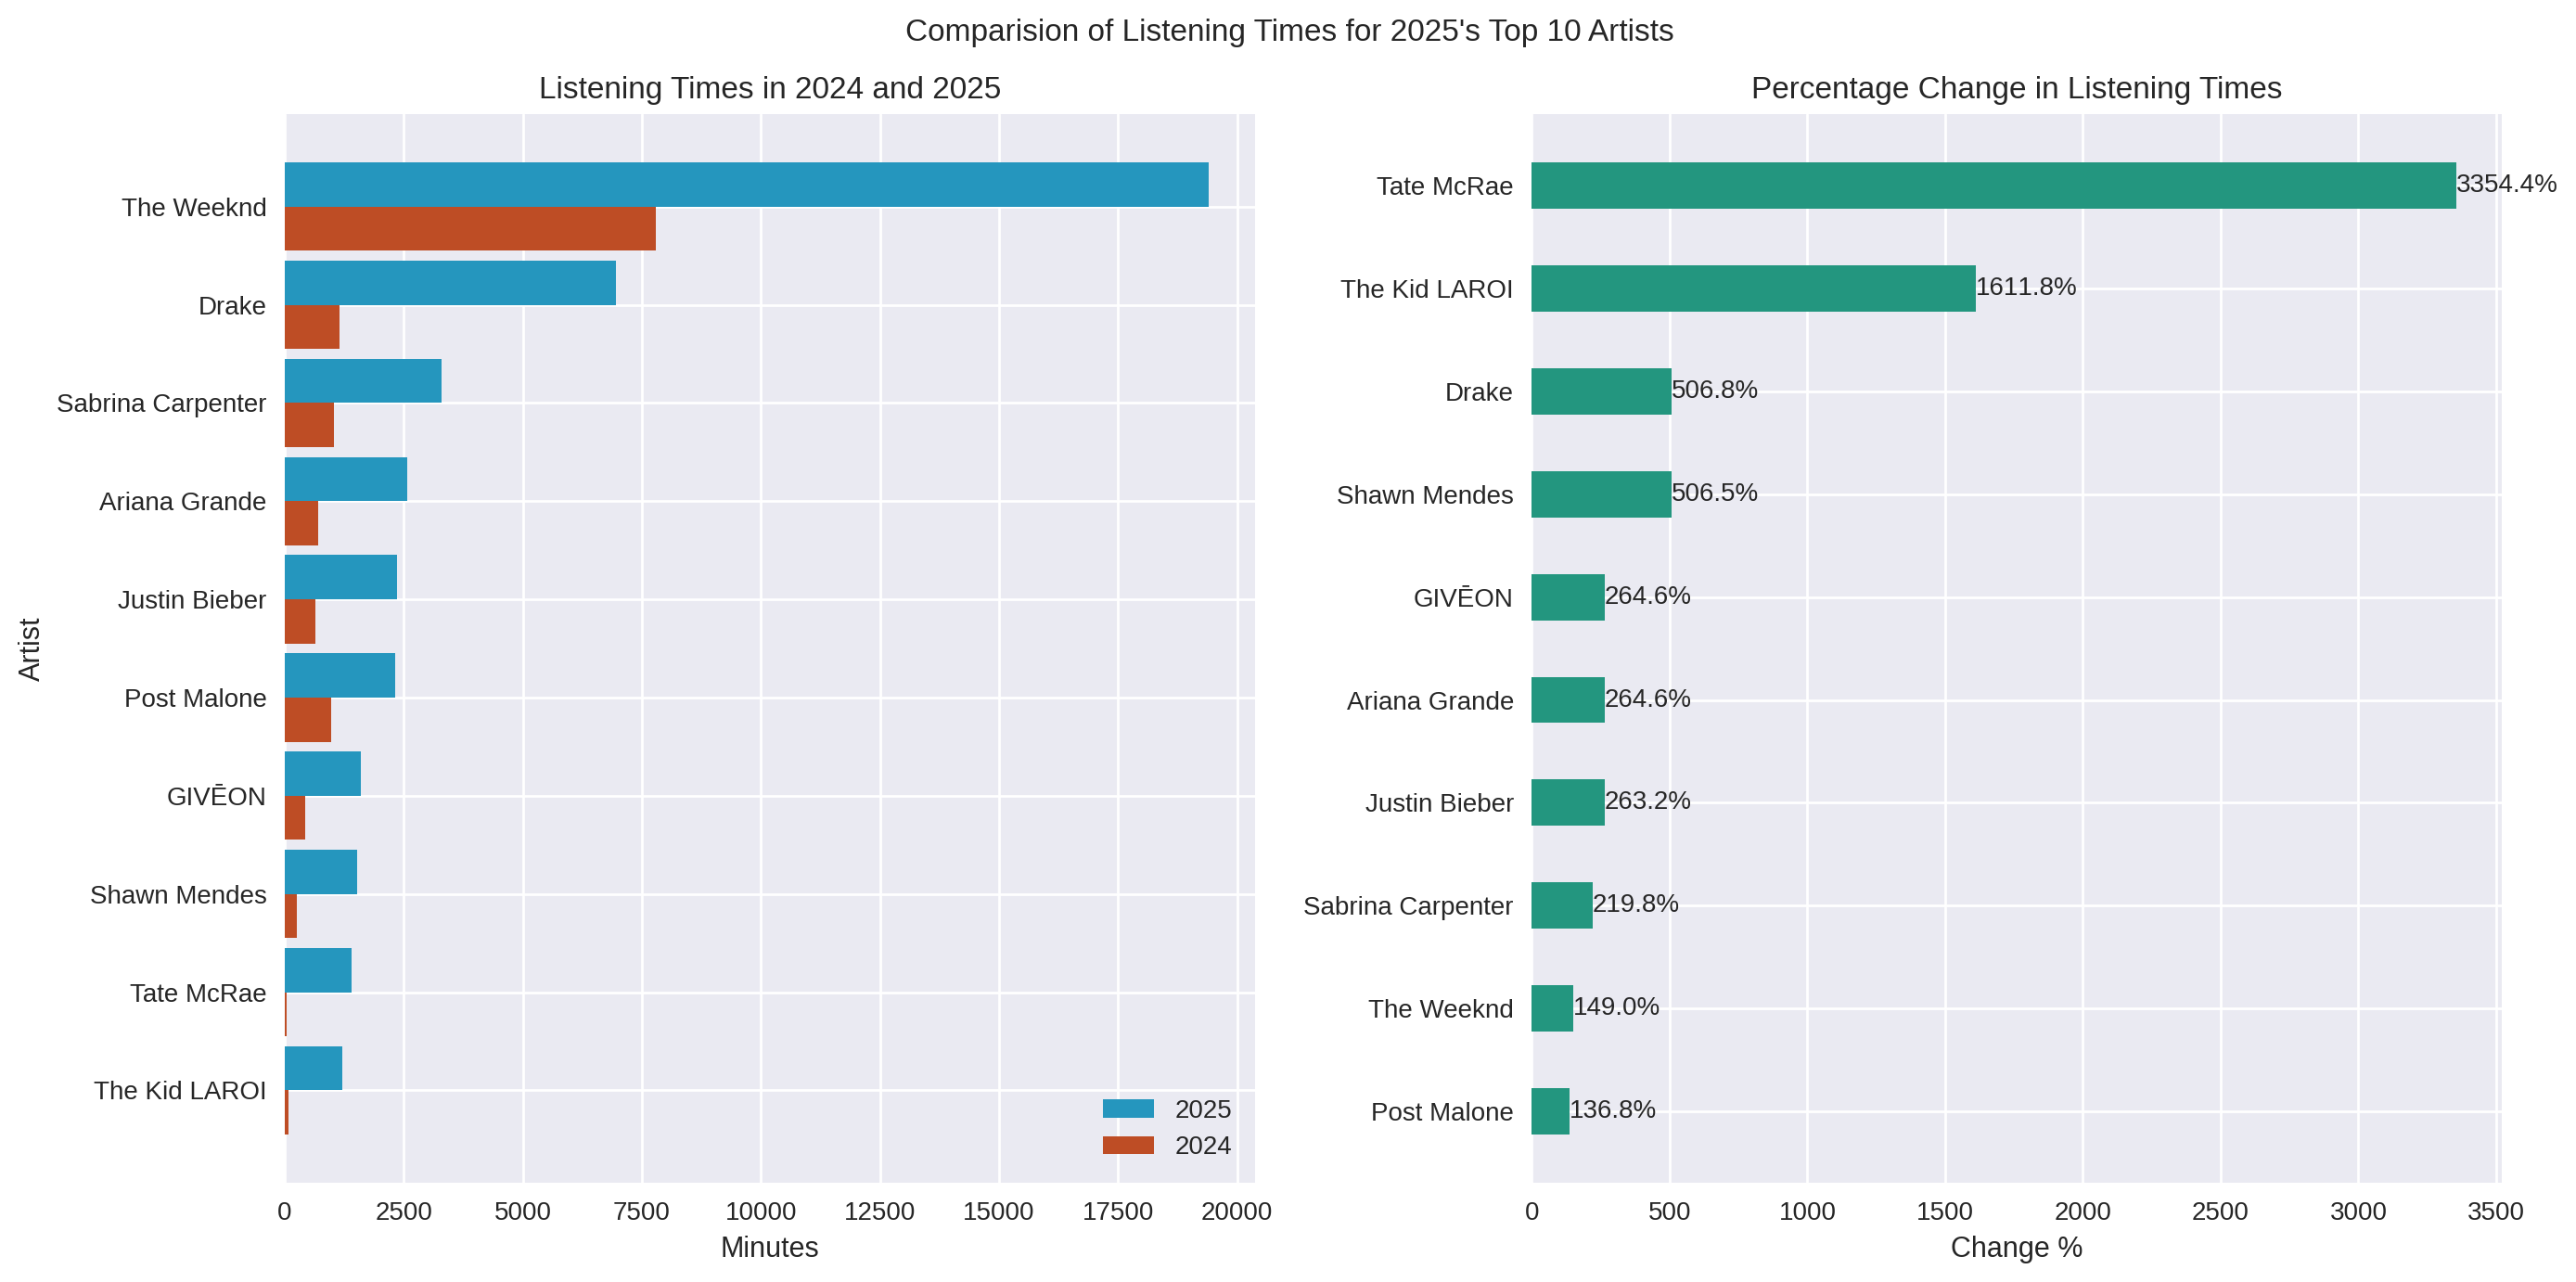

In [ ]:
initial = np.arange(10)
height = 0.45
offset = initial + height

fig, ax = plt.subplots(1,2, figsize=(14,7))

dataset = changes_df.sort_values(2025, ascending=False)[0:10]

listening_2025 = ax[0].barh(data=dataset, y=initial, width=dataset[2025], height=height, color='#2596be')
listening_2024 = ax[0].barh(data=dataset, y=offset, width=dataset[2024], height=height, color='#be4d25')
ax[0].legend([2025, 2024])
ax[0].set_yticks(initial+height/2)
ax[0].set_yticklabels(dataset["Artist"])
ax[0].yaxis.set_inverted(True)
ax[0].set_xlabel("Minutes")
ax[0].set_title("Listening Times in 2024 and 2025")
ax[0].set_ylabel("Artist")

bars = ax[1].barh(data=dataset.sort_values('Change_%'), y=initial+height/2, height=height, width='Change_%', color='#23967F')
ax[1].set_yticks(initial+height/2)
ax[1].set_yticklabels(dataset.sort_values('Change_%')["Artist"])
ax[1].set_xlabel("Change %")
ax[1].set_title("Percentage Change in Listening Times")
ax[1].bar_label(bars, fmt='%.1f%%')
fig.suptitle("Comparision of Listening Times for 2025's Top 10 Artists")

plt.tight_layout()
plt.show()

All the top 10 artists in 2025 have seen an increase in their playtimes compared to 2024, with 4 new artists (GIVĒON, Shawn Mendes, Tate McRae, and The Kid LAROI) entering the top 10 in 2025.


---



Displaying the artists with playtimes of at least 50 hours or more in a year.

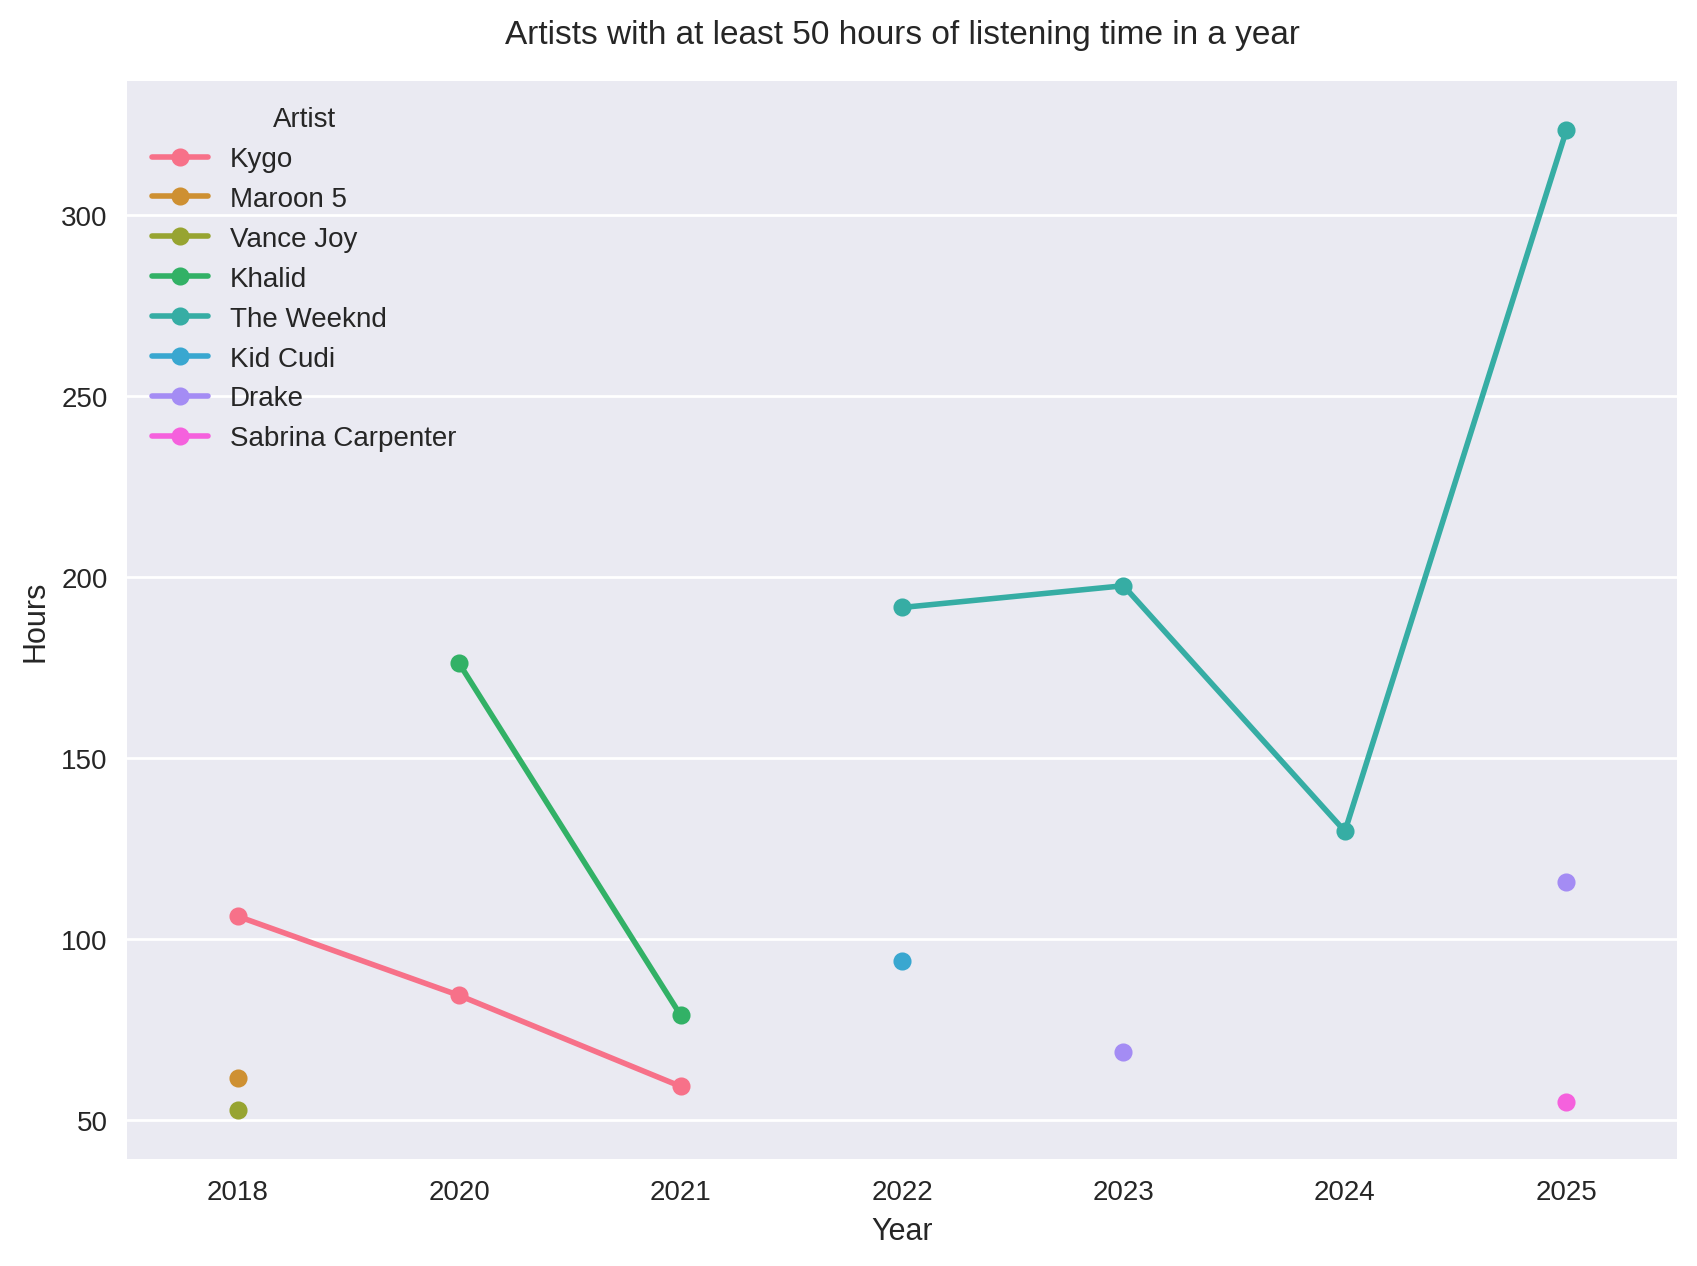

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))

minimum = 50
sns.pointplot(data=artist_years[artist_years["Hours"] >= minimum ], x="Year", y="Hours", hue="Artist", linewidth=2, ax=ax)
ax.set_title('Artists with at least {} hours of listening time in a year'.format(minimum), y=1.02, size=12)
sns.color_palette(palette='Paired')
plt.show()

Apart from 2024, every year has had at least two artists with a playtime of at least 50 hours.

---



Plotting total minutes of music listening per year.

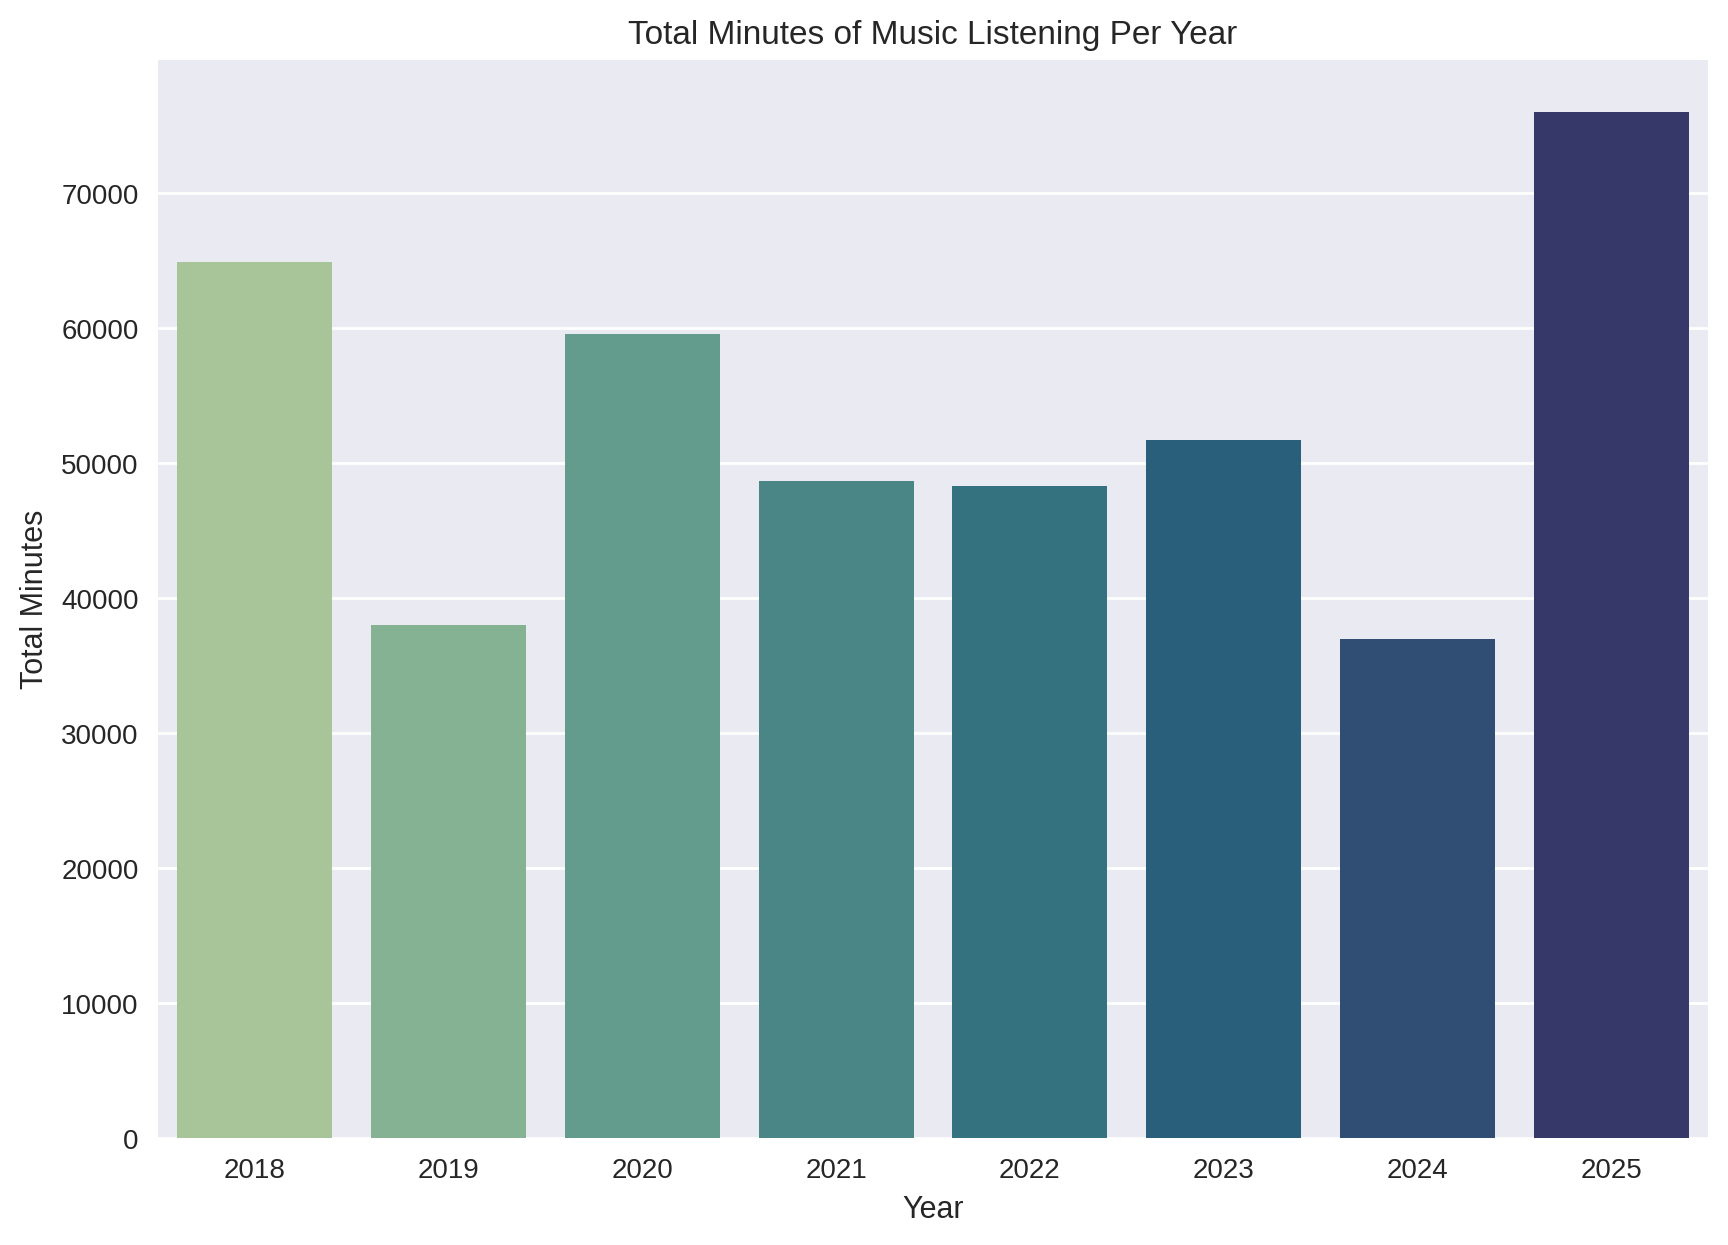

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))

sns.barplot(x="Year", y='Total_Minutes', data=listening_by_year, hue='Year', legend=None, palette='crest', edgecolor='none', ax=ax)
ax.set_title("Total Minutes of Music Listening Per Year")
ax.set_ylabel('Total Minutes')
plt.show()

The average listening minutes appears to be around 50,000 per year, with 2025 seeing a sharp increase.


---



Plotting trends of monthly listening times per year.

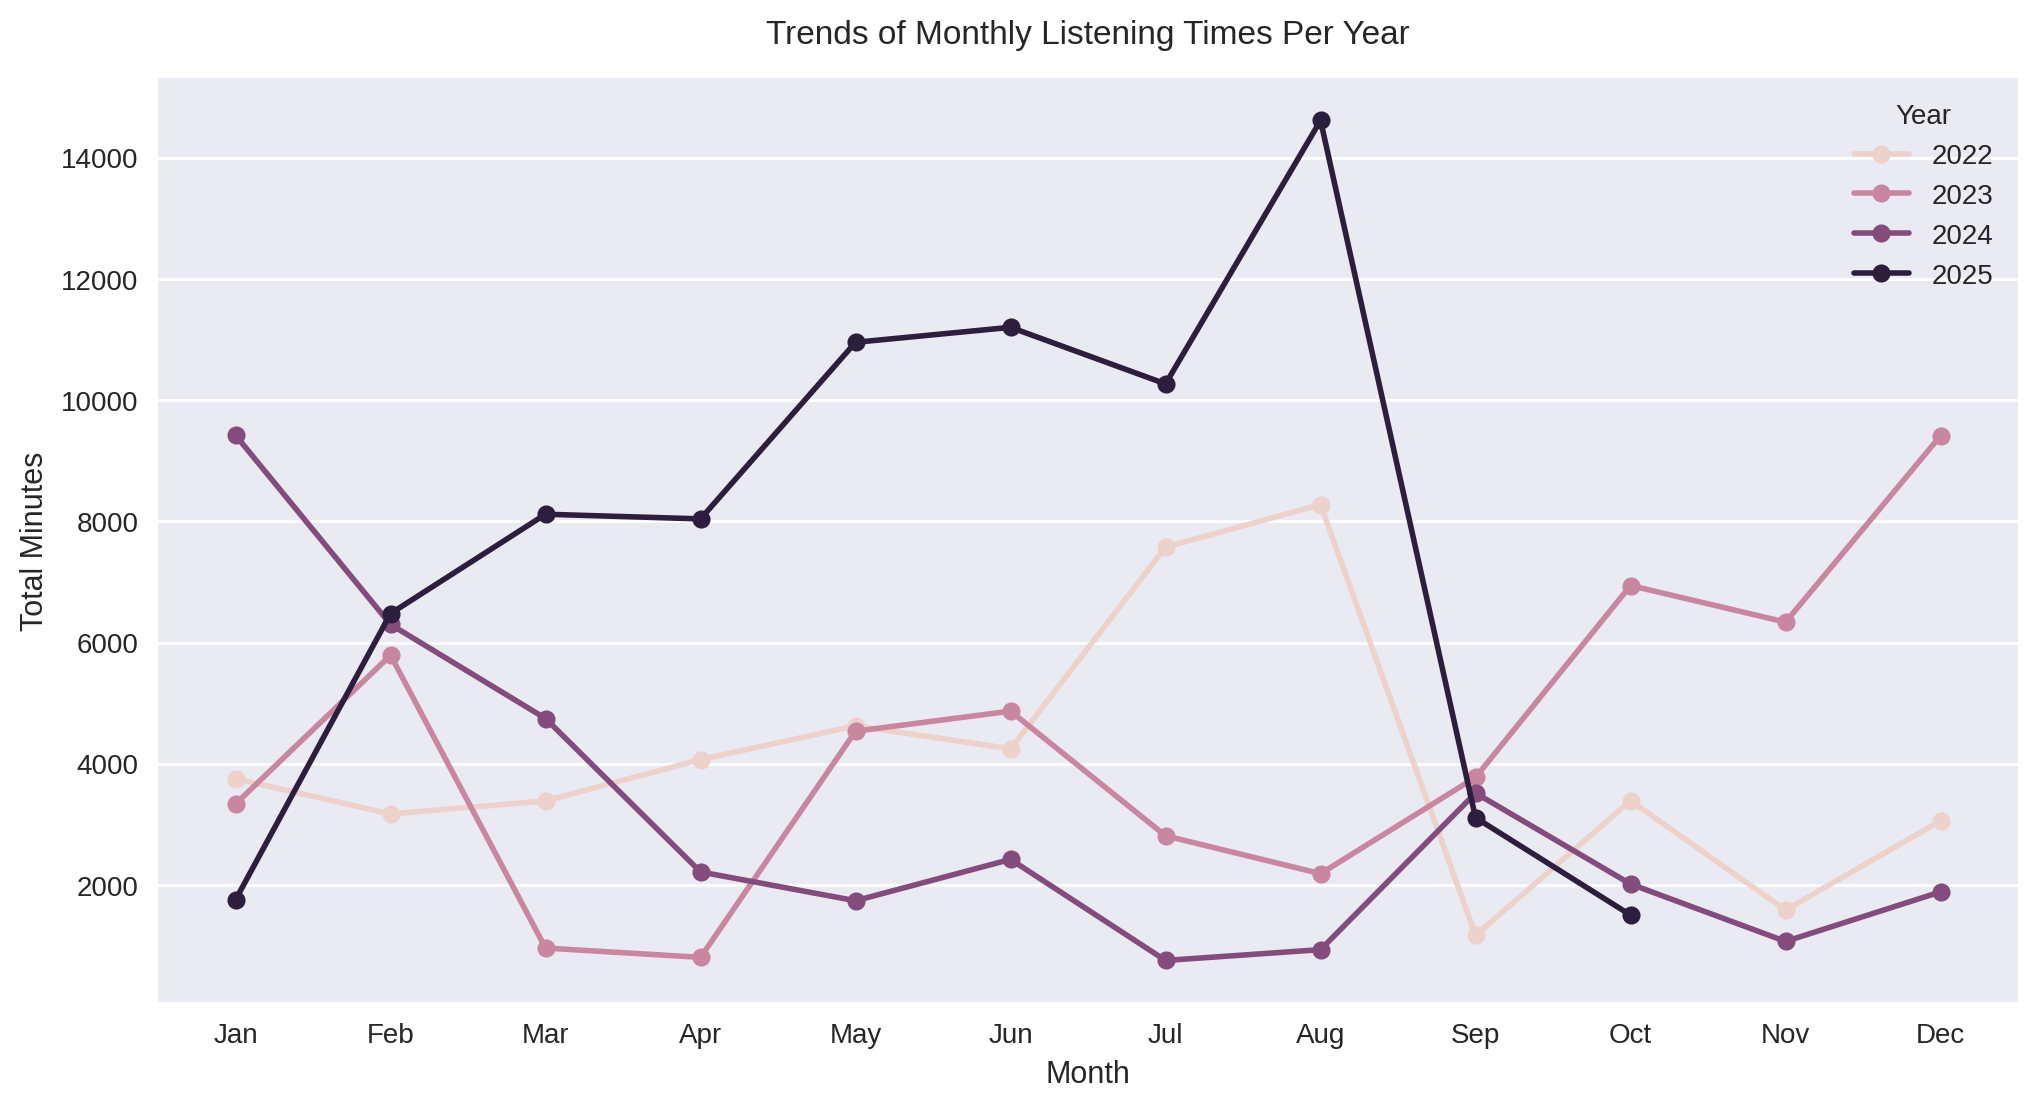

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

sns.pointplot(playtime_by_month[playtime_by_month["Year"] >= 2022], x="Month", y="Total_Minutes", hue="Year", linewidth=2, ax=ax)
ax.set_title("Trends of Monthly Listening Times Per Year", y=1.02, size=12)
ax.set_ylabel('Total Minutes')
plt.show()

### All Time Data

Plotting the cumulative listening times over the years and each artists' share of my total listening times

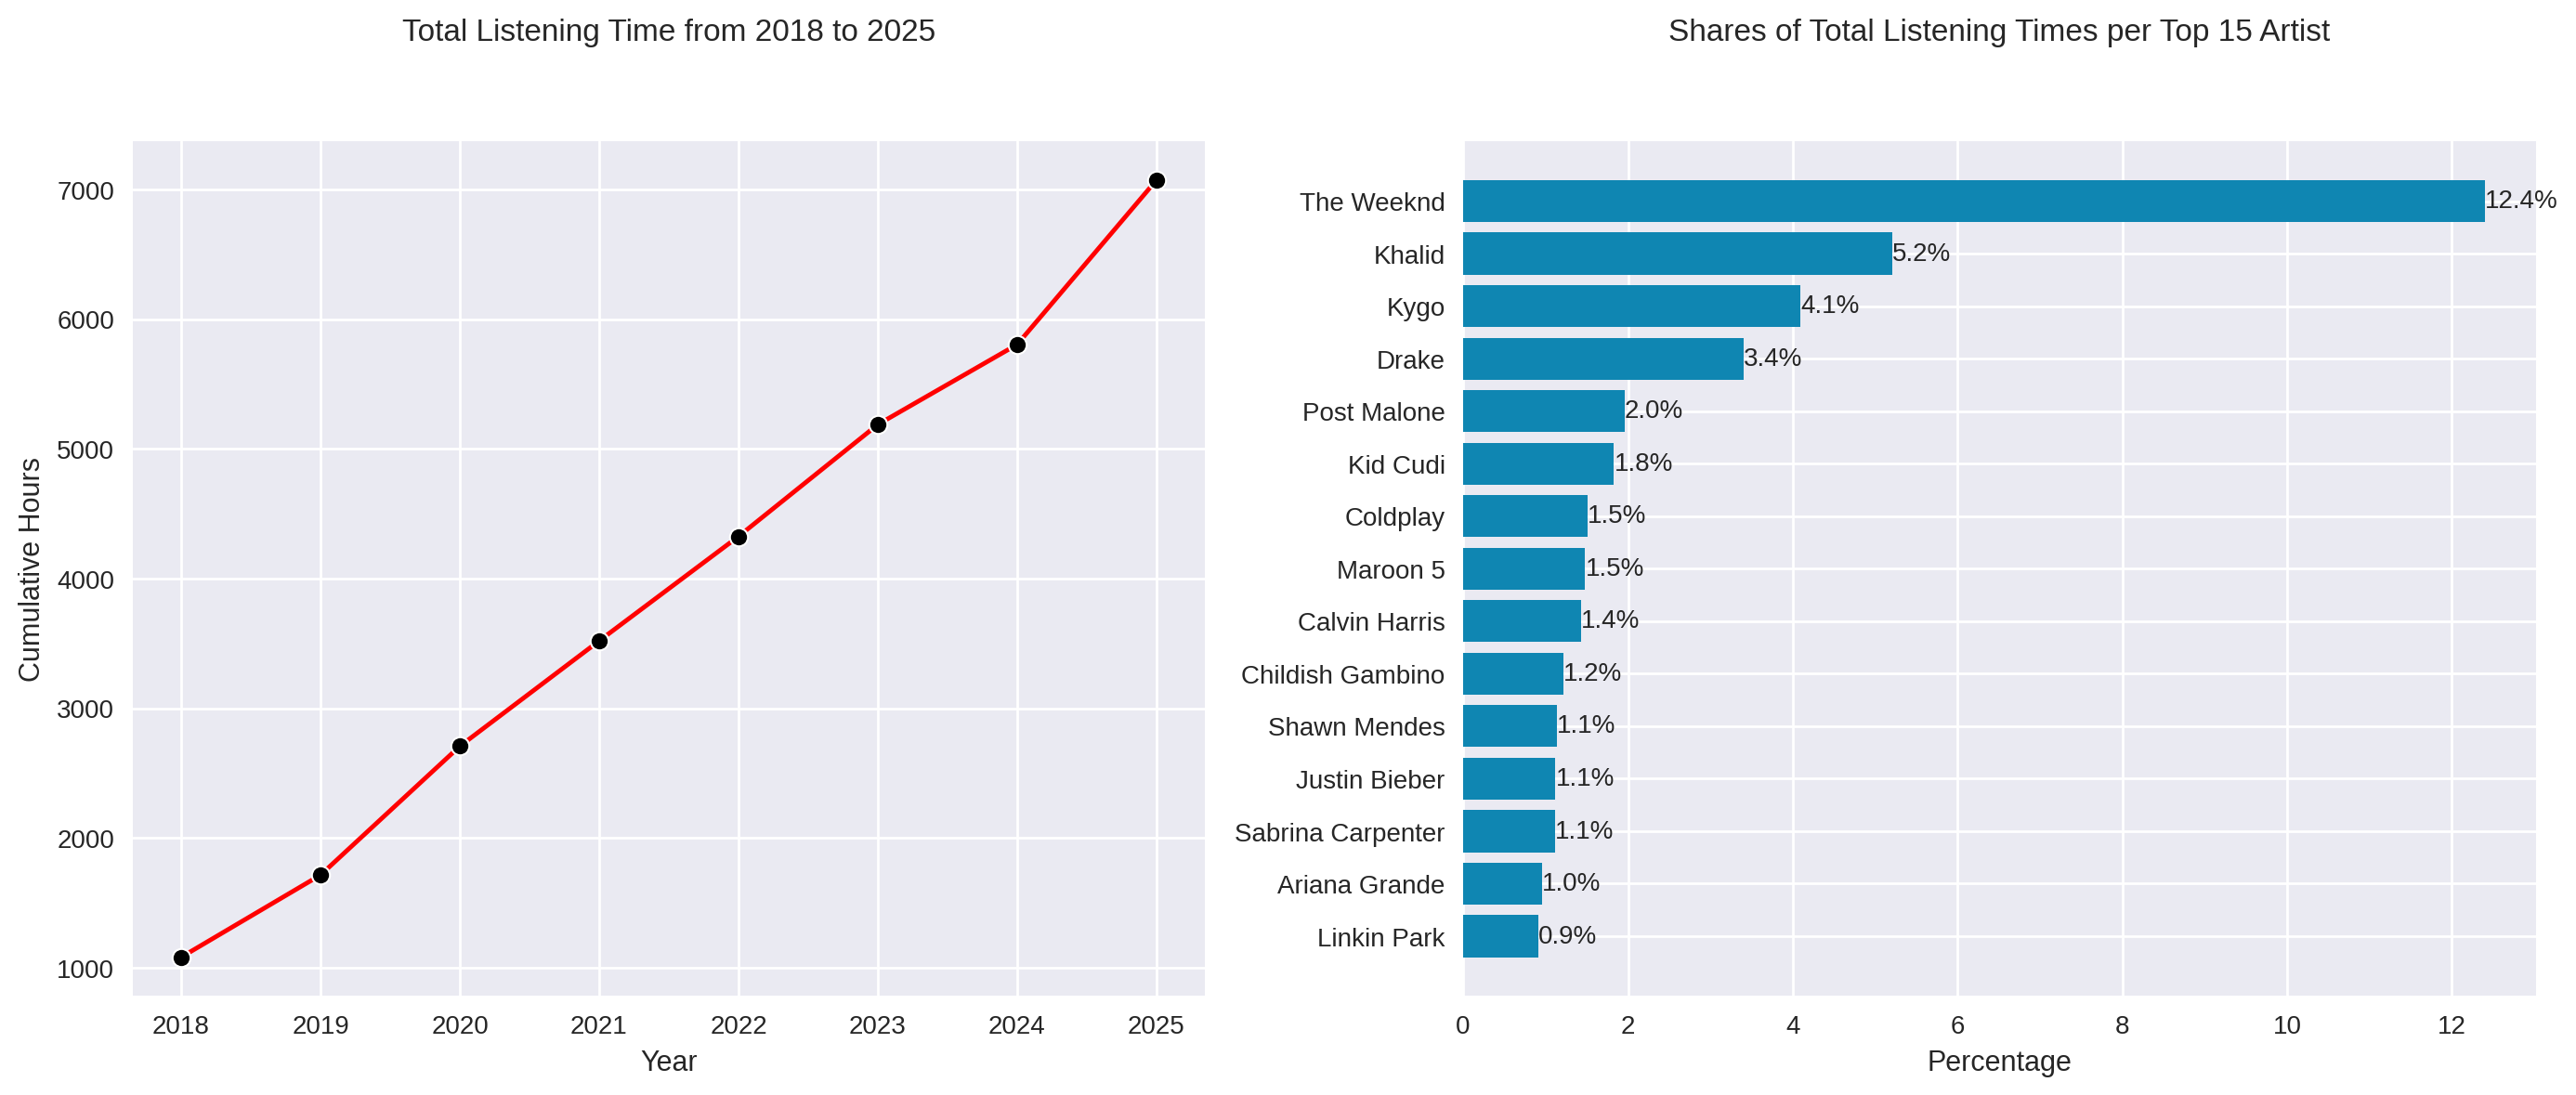

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.lineplot(data=listening_by_year, x="Year", y="Cumulative_Total_Hours", ax=axes[0], color='r', marker='o', markerfacecolor='black')
axes[0].set_title('Total Listening Time from {} to {}'.format(listening_by_year['Year'].min(), listening_by_year['Year'].max()), y=1.1)
axes[0].set_ylabel("Cumulative Hours")

bars = axes[1].barh(data=artist_total_hours_top15, y='Artist', width='Percentage of Total Hours', color='#0f86b2')
axes[1].set_title('Shares of Total Listening Times per Top 15 Artist', y=1.1)
axes[1].set_xlabel('Percentage')
axes[1].bar_label(bars, fmt='%.1f%%')
axes[1].yaxis.set_inverted(True)

plt.tight_layout()
plt.show()

Since 2019, the increase has been consistent, roughly a 1000 hours per year. There's a dip in the increase between 2023 and 2024, followed by a sharp increase in 2025.

The top 15 artists account for 40% of my total listening time.


---



Plotting the 20 of my most played songs since 2018 against their respective playtimes in minutes

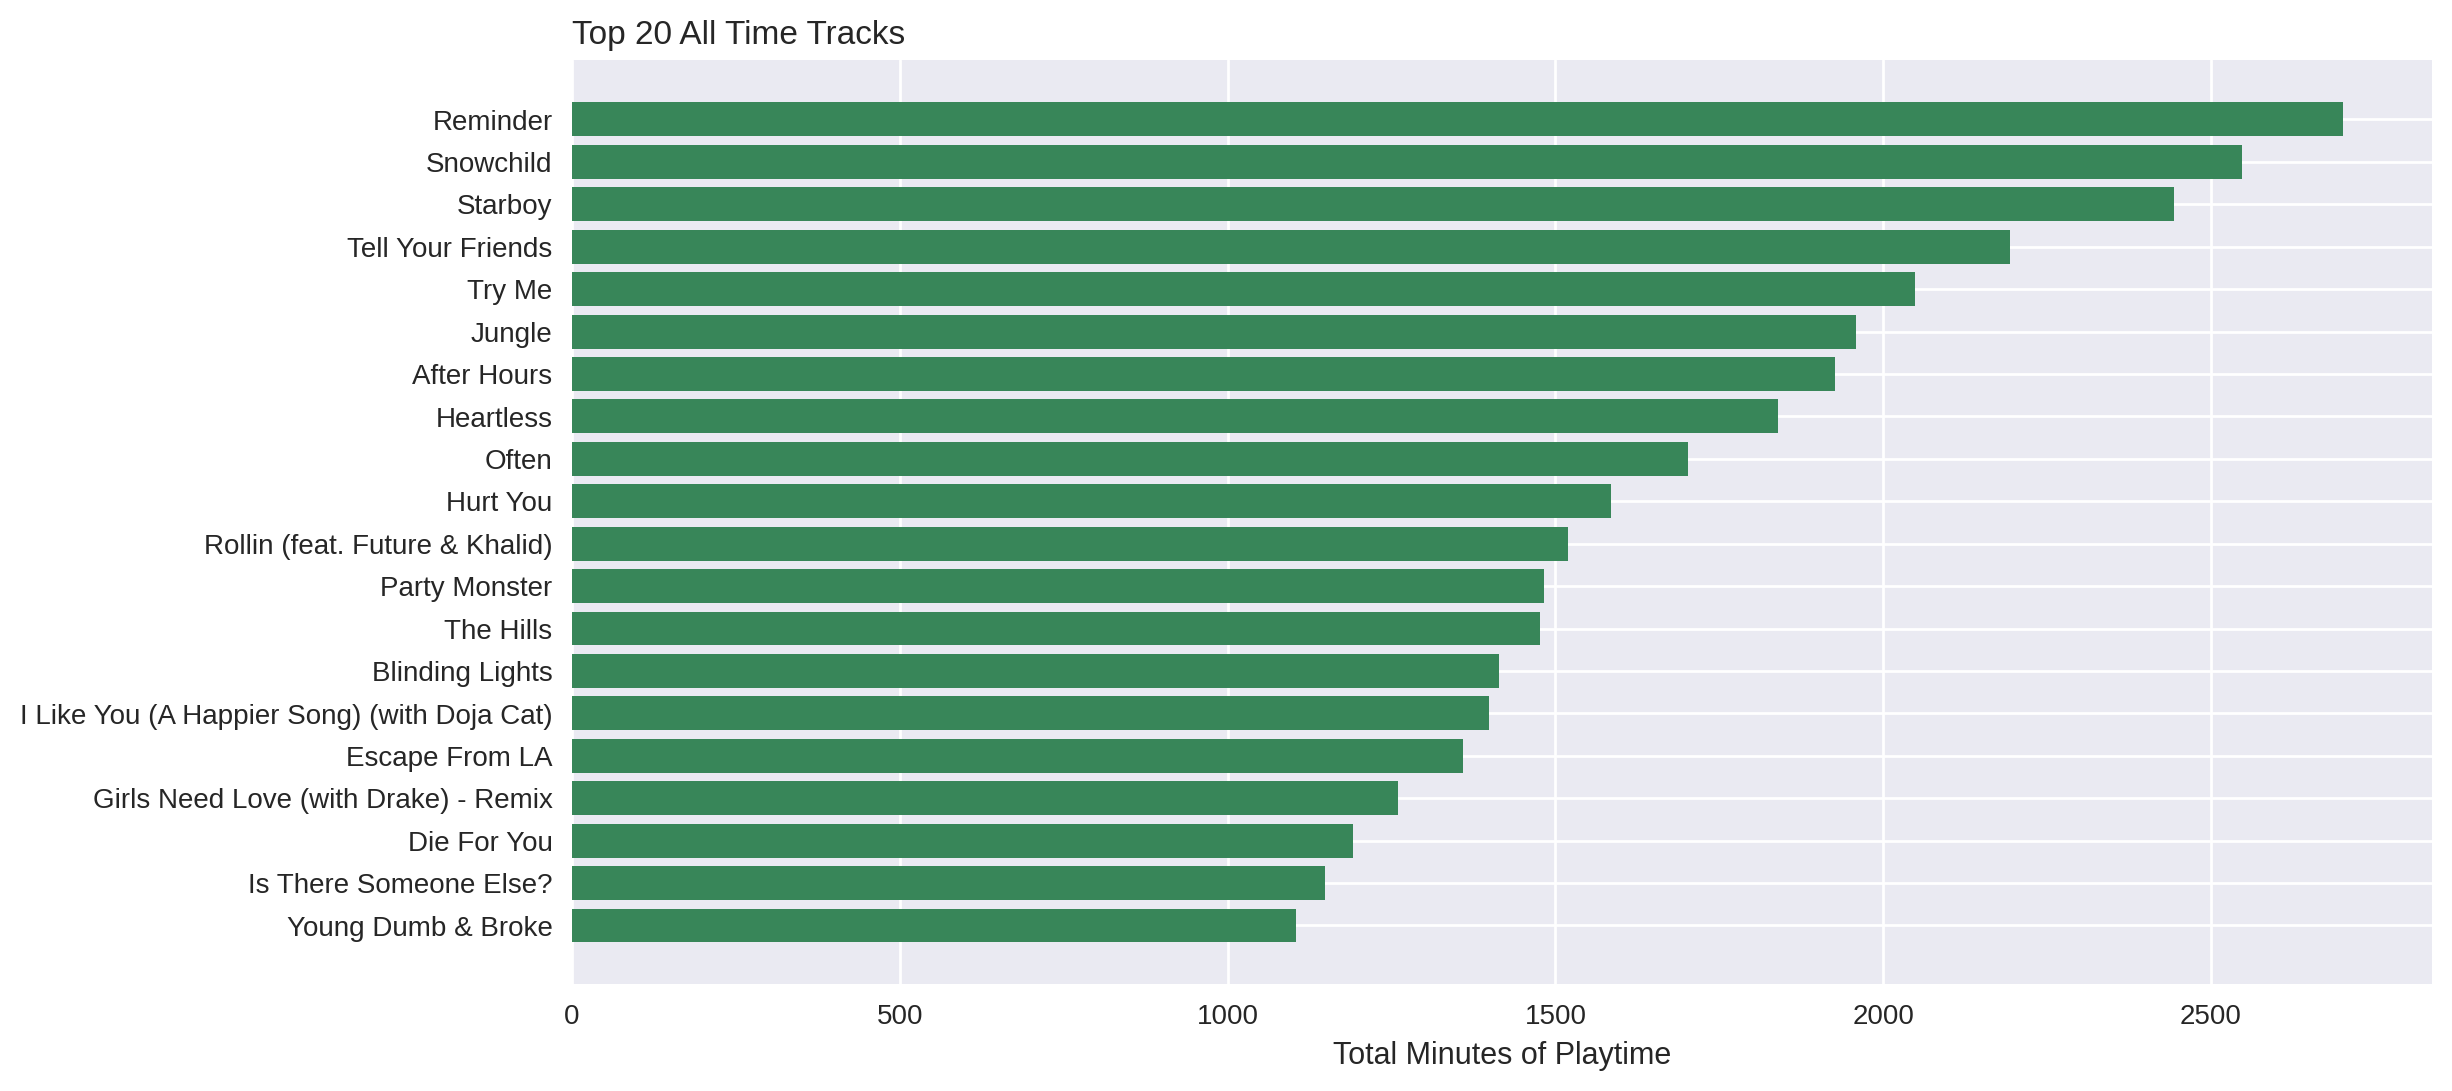

,cover,Track_name,Artist,release_date
0,,Reminder,The Weeknd,2016-11-25
1,,Snowchild,The Weeknd,2020-03-20
2,,Starboy,The Weeknd,2016-11-25
3,,Tell Your Friends,The Weeknd,2015-08-28
4,,Try Me,The Weeknd,2018-03-30
5,,Jungle,Drake,2015-02-12
6,,After Hours,The Weeknd,2020-03-20
7,,Heartless,The Weeknd,2020-03-20
8,,Often,The Weeknd,2015-08-28
9,,Hurt You,The Weeknd,2018-03-30


In [ ]:
num = 20 #Alter this number to change the range of songs

fig, ax = plt.subplots(1, 1, figsize=(12,6))

ax.barh(data = num_of_unique_songs[0:num], y="Track_name", width = "Minutes_Played", color='#388659')
ax.set_title(f"Top {num} All Time Tracks ", loc='Left')
ax.set_xlabel("Total Minutes of Playtime")
ax.yaxis.set_inverted(True)
plt.show()

display(num_of_unique_songs[['cover','Track_name', 'Artist', 'release_date']]
        .head(num).style.format({'cover':image_display }))

Next steps:


*   Attribute listening times to featured artists as well (currently only the main artist gets full credit for a song as that's how Spotify has chosen to record it in the data I retrieved from them)
*   Identify spikes in listening times for an artist and investigate spike and album release relationship.
*   Retrieve genre for songs to identify favourites





In [ ]:
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

Execution time:  165.17839336395264 secs
